## Load Data

In [1]:
#imort required libraries

#import pandas
import pandas as pd
#import pandas
import numpy as np

#Adjust display width
from IPython.core.display import display, HTML
display(HTML("<style>.container{width : 100% !important}</style>"))
#change scroll window size
display(HTML("<style>div.output_scroll { height: 56em; }</style>"))

/tmp/ipykernel_20029/1713848509.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:


loan_data = pd.read_csv('./loan.csv')

# Display the first few rows of the dataframe
loan_data.head()

/tmp/ipykernel_20029/988332521.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('./loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check for missing values
missing_values = loan_data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

# Check data types of the columns
data_types = loan_data.dtypes

data_types

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data Cleaning

### Drop Columns with a High Percentage of Missing Values

In [4]:

# Set the threshold for dropping columns (e.g., more than 50% missing)
threshold = 0.5 * len(loan_data)

# Drop columns with more than the threshold of missing values
loan_data_cleaned = loan_data.dropna(axis=1, thresh=threshold)

# Display the remaining columns
loan_data_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Remove fields not relevant to the analysis

In [5]:
# id and member_id, url, desc is not relevant to loan evaluation

loan_data_cleaned = loan_data_cleaned.drop(columns=['id', 'member_id', 'url', 'desc'])

### Standardising Values

In [6]:
# Convert percentage strings to numerical values
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].astype(str).str.rstrip('%').astype(float)
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].astype(str).str.rstrip('%').astype(float) 

# Convert date strings to datetime objects
date_columns = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
for column in date_columns:
    loan_data_cleaned[column] = pd.to_datetime(loan_data_cleaned[column], format='%b-%y', errors='coerce')

# Ensure numerical columns are of the correct type
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 
                     'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                     'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                     'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                     'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']

for column in numerical_columns:
    loan_data_cleaned[column] = loan_data_cleaned[column].astype(float)

# Verify the data types
loan_data_cleaned.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_c

### Remove columns with only one unique value

In [7]:
#Since columns with only one unique value does not affect the analysis result
col_uniq_val_cnt = loan_data_cleaned.nunique()

max_1_unique_val_cols = col_uniq_val_cnt[col_uniq_val_cnt == 1]
uniq_col_list = max_1_unique_val_cols.index.to_list()

#droping columns
loan_data_cleaned.drop(columns=uniq_col_list, inplace=True)
uniq_col_list, loan_data_cleaned.shape

(['pymnt_plan',
  'initial_list_status',
  'collections_12_mths_ex_med',
  'policy_code',
  'application_type',
  'acc_now_delinq',
  'chargeoff_within_12_mths',
  'delinq_amnt',
  'tax_liens'],
 (39717, 41))

In [8]:
# Convert date strings to datetime objects
date_columns = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
for column in date_columns:
    loan_data_cleaned[column] = pd.to_datetime(loan_data_cleaned[column], format='%b-%Y', errors='coerce')

# Verify the data types
loan_data_cleaned.dtypes


loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                       float64
earliest_cr_line           datetime64[ns]
inq_last_6mths                    float64
open_acc                          

### Remove outlier data

In [9]:
#Remove outlier values , outlier is removed by IQR method
numeric_cols = loan_data_cleaned.select_dtypes(include=['number']).columns
for col_name in numeric_cols:
    q1 = loan_data_cleaned[col_name].quantile(.25)
    q3 = loan_data_cleaned[col_name].quantile(.75)
    IQR = q3 - q1
    lb = (q1 - 2 * IQR)
    ub = (q3 + 2 * IQR)
    criteria = (loan_data_cleaned[col_name] >= lb) & (loan_data_cleaned[col_name] <= ub)
    loan_data_cleaned = loan_data_cleaned[criteria]    

### Imputing data values with media/mode

In [10]:


# Create a copy of the DataFrame to avoid SettingWithCopyWarning
loan_data_cleaned_copy = loan_data_cleaned.copy()

# Fill missing values for numerical columns with the median
for column in loan_data_cleaned_copy.select_dtypes(include=['float64', 'int64']).columns:
    loan_data_cleaned_copy[column].fillna(loan_data_cleaned_copy[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode
for column in loan_data_cleaned_copy.select_dtypes(include=['object']).columns:
    loan_data_cleaned_copy[column].fillna(loan_data_cleaned_copy[column].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after_cleaning = loan_data_cleaned_copy.isnull().sum().sum()
print(f'Total missing values after cleaning: {missing_values_after_cleaning}')

Total missing values after cleaning: 11


### Check & Remove Duplicates

In [11]:


# Check for duplicates
duplicate_rows = loan_data_cleaned_copy.duplicated().sum()

# Remove duplicates
loan_data_cleaned_copy = loan_data_cleaned_copy.drop_duplicates()

# Verify that duplicates have been removed
duplicates_after_removal = loan_data_cleaned_copy.duplicated().sum()

duplicate_rows, duplicates_after_removal


(0, 0)

### Analyse the categorical data columns and standardise value

In [12]:


#Check unique values of loan_status
loan_data_cleaned_copy['loan_status'].unique()

# For loan data analysis records with 'Current' value is not required and it will be filtered in later stages of data cleaning


#Check term
loan_data_cleaned_copy['term'].unique()

#Check emp_length
loan_data_cleaned_copy['emp_length'].unique()

#Check home_ownership
loan_data_cleaned_copy['home_ownership'].unique()

#Check verification_status
loan_data_cleaned_copy['verification_status'].unique()

#Correcting value 'Source Verified'  to 'Verified'
loan_data_cleaned_copy['verification_status'] = loan_data_cleaned_copy['verification_status'].replace('Source Verified', 'Verified')



In [13]:
# Exclude loan_status 'Current' from dataset

loan_data_cleaned_copy = loan_data_cleaned_copy[~ (loan_data_cleaned_copy['loan_status'] == 'Current')]
loan_data_cleaned_copy['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Univariate Analysis

In [14]:
#import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [15]:
#generic function to show percentage on top of plotted bar

def show_percentage(ax):
    # Calculate the percentages
    total = len(loan_data_cleaned_copy)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            perc = (height / total) * 100
            percentage = f'{perc:.1f}%'
            if  perc > 0:
                ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')
        
# Function to trim labels
def trim_labels(labels, limit):
    return [label if len(label) <= limit else label[:limit] + '...' for label in labels]

### Analyse numeric data values 

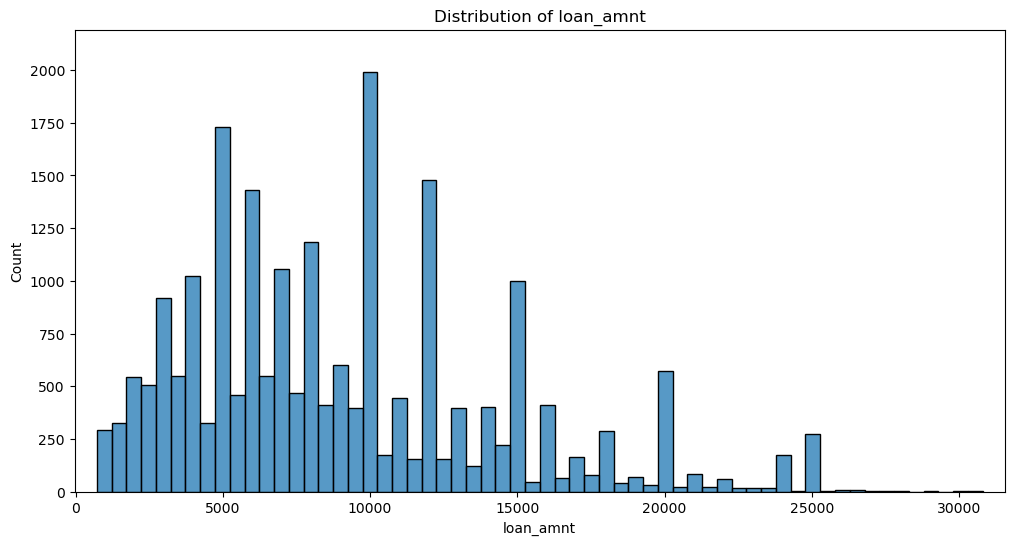

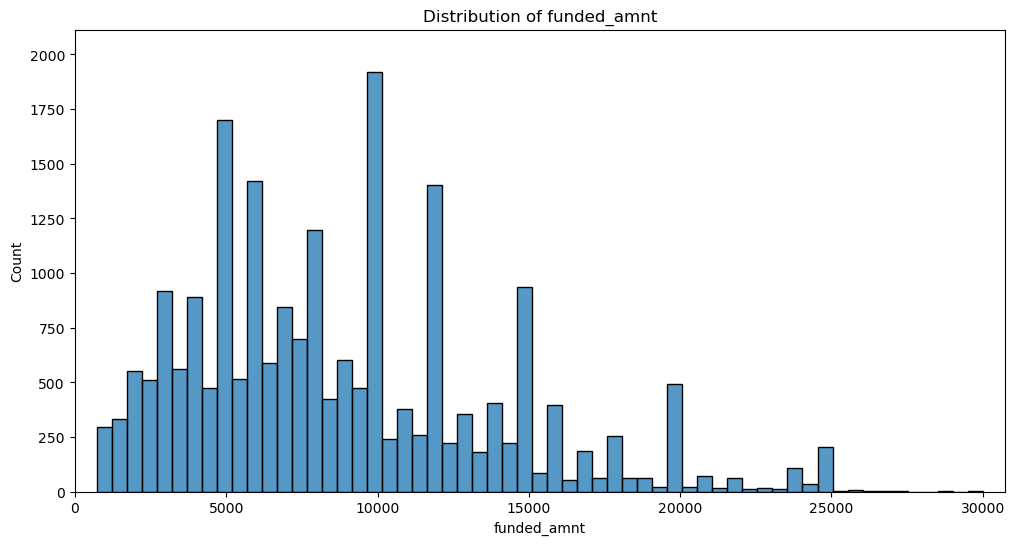

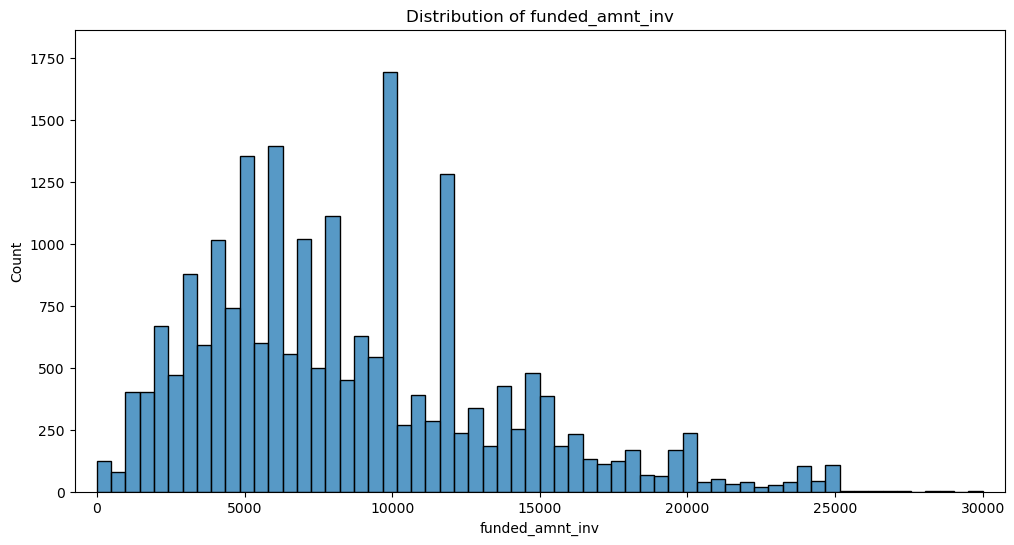

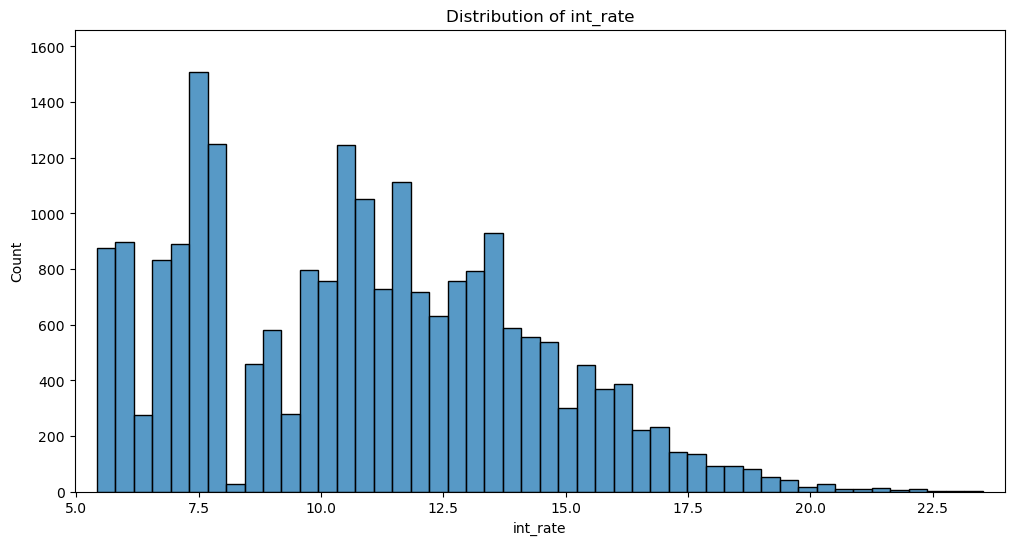

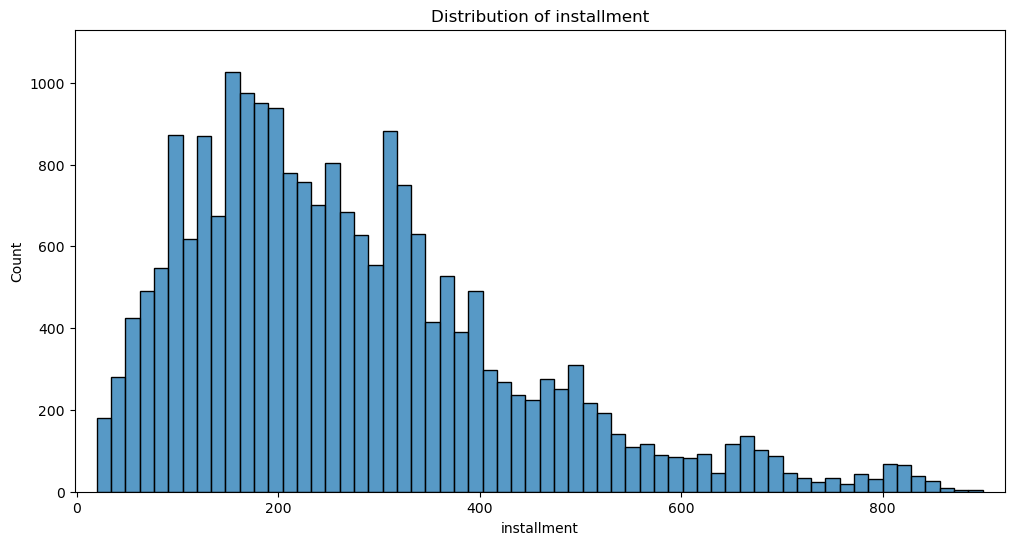

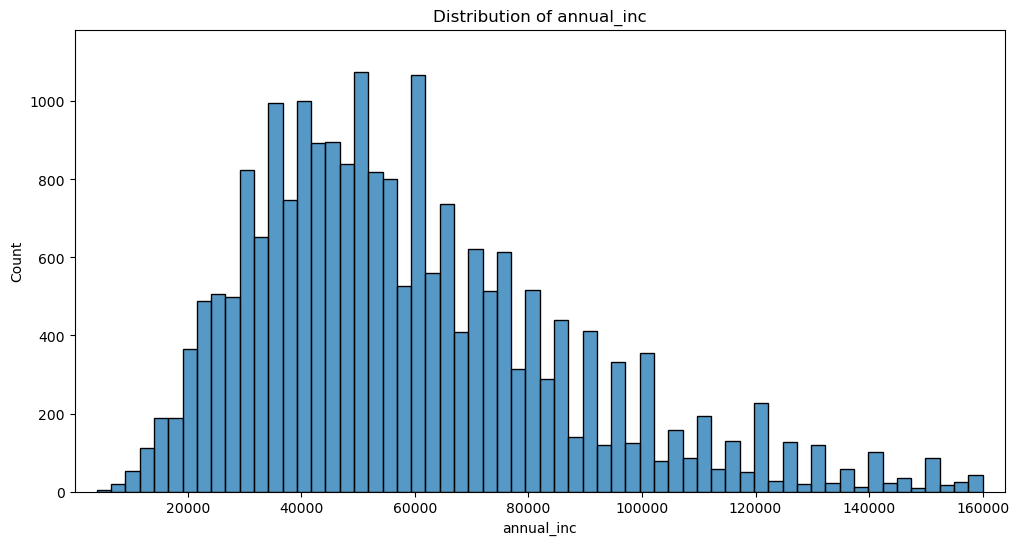

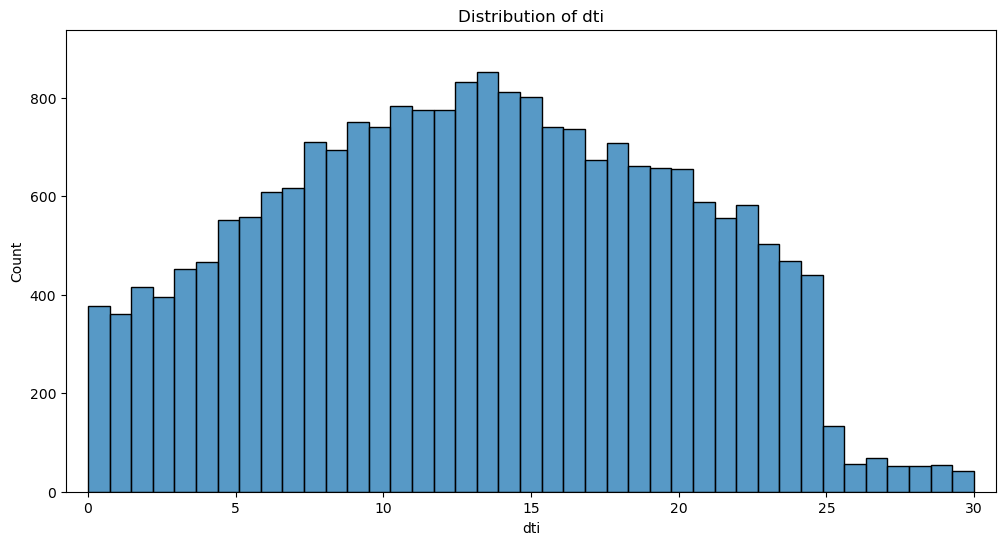

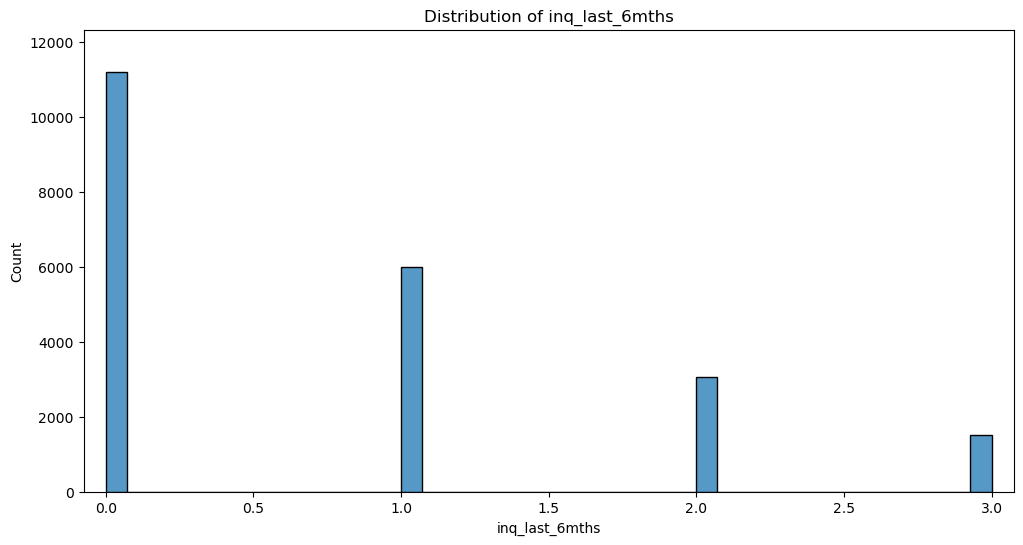

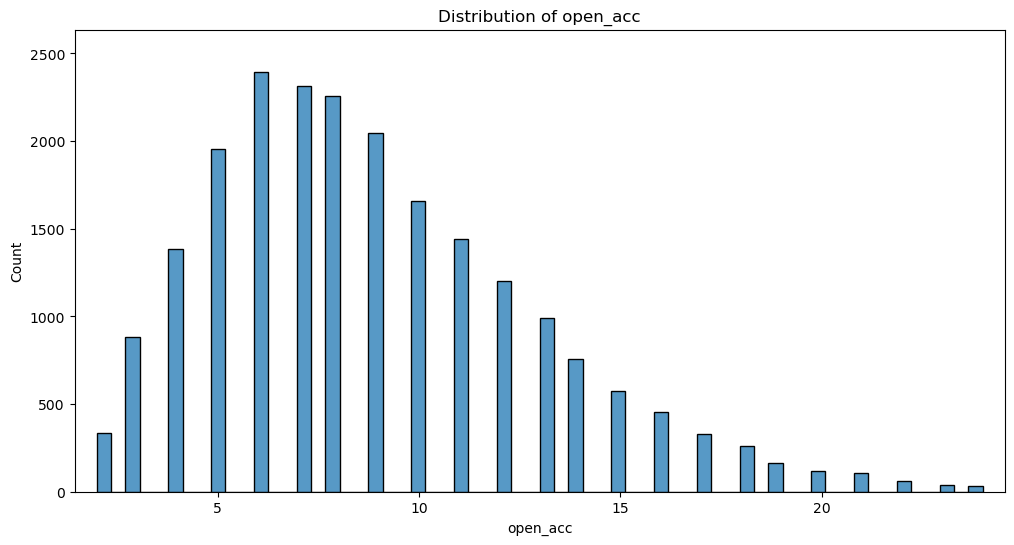

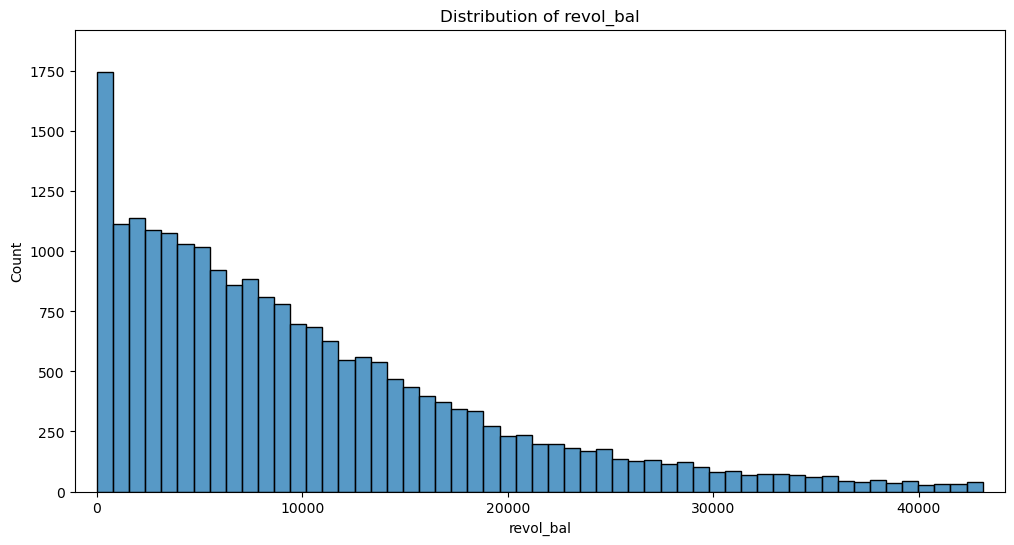

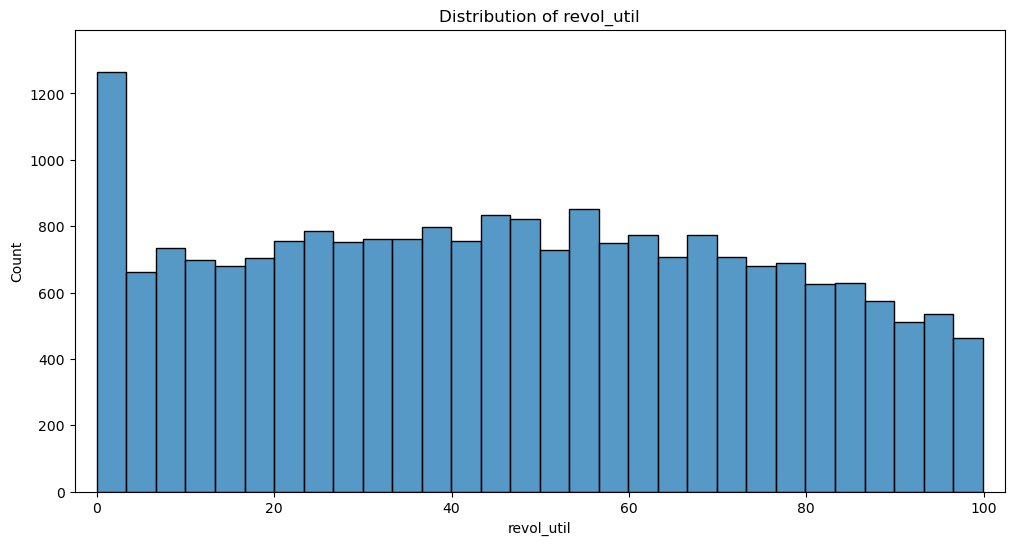

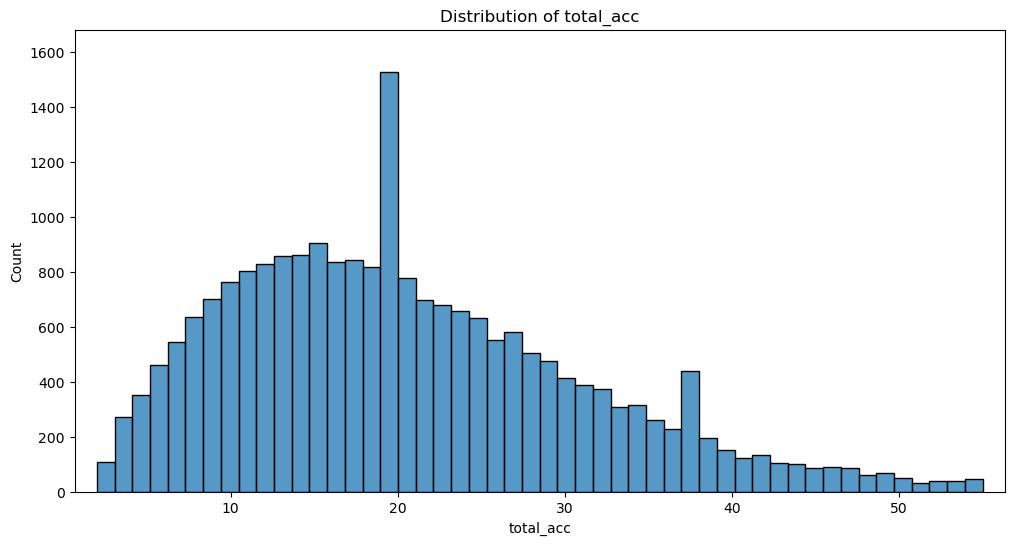

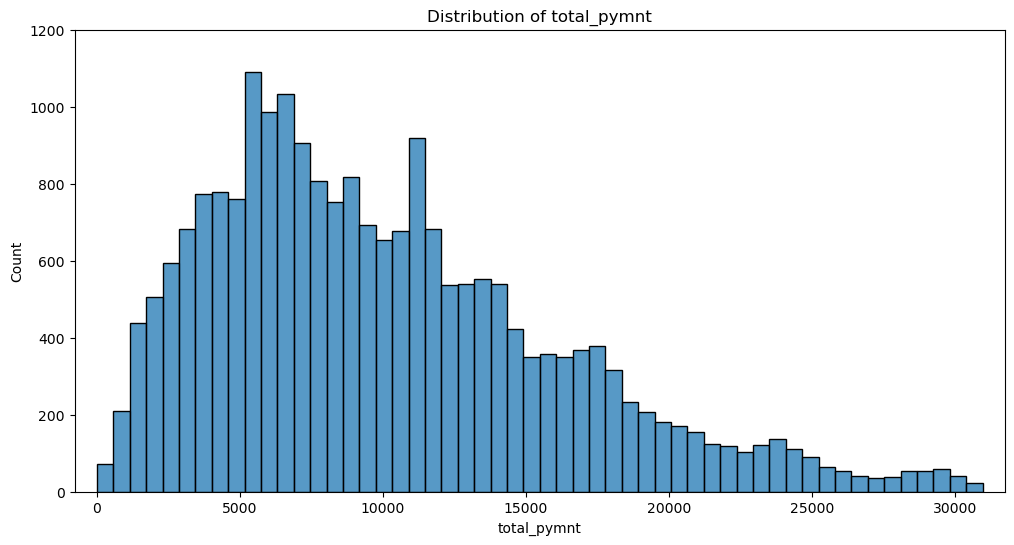

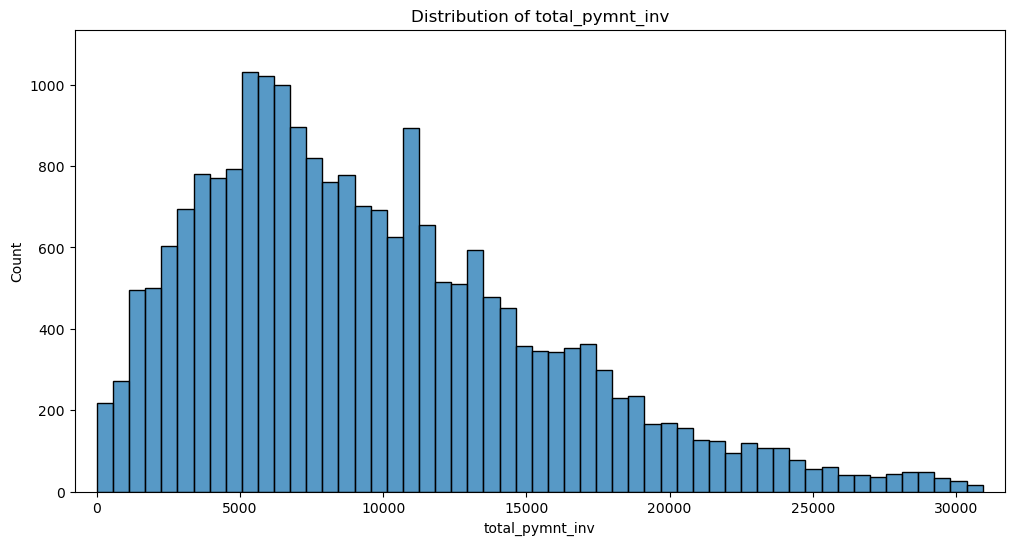

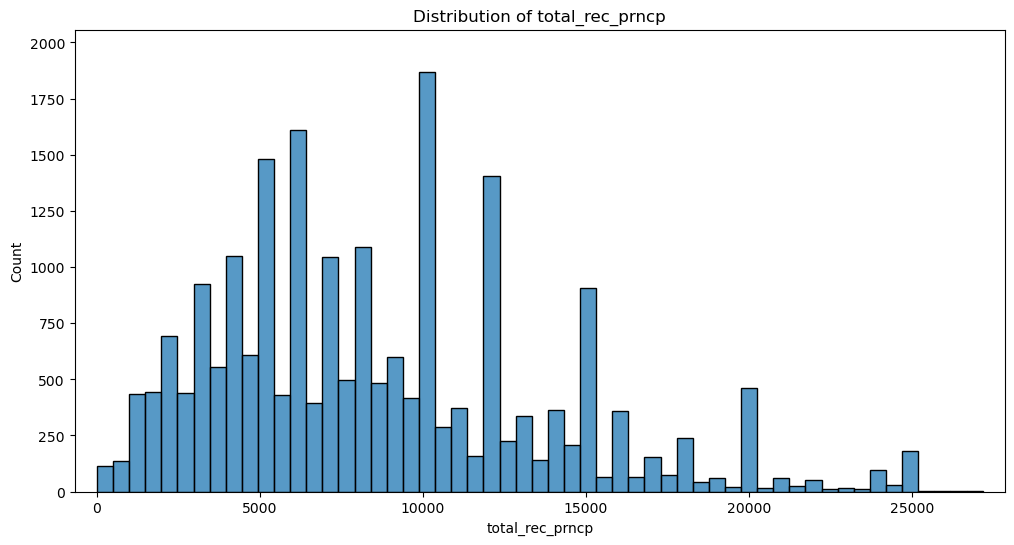

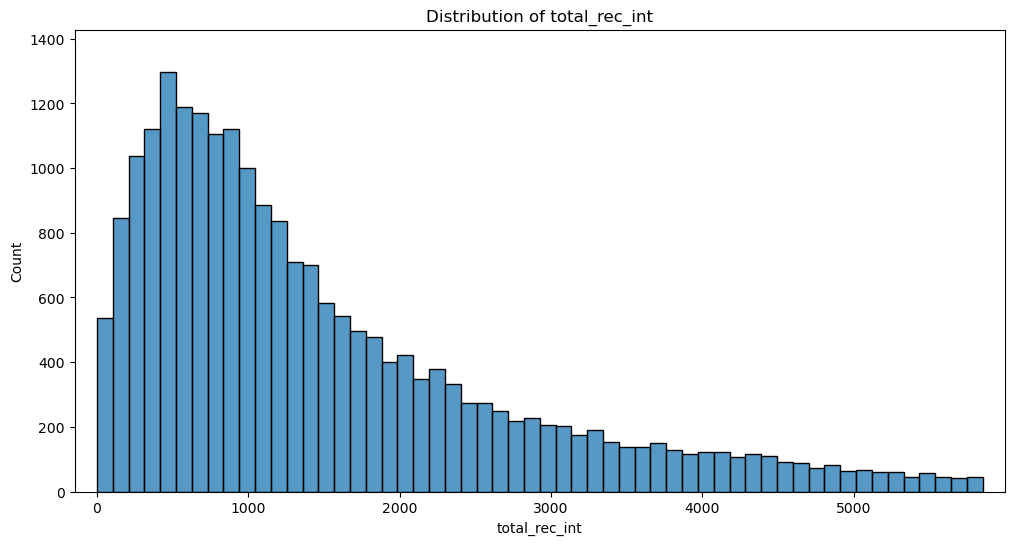

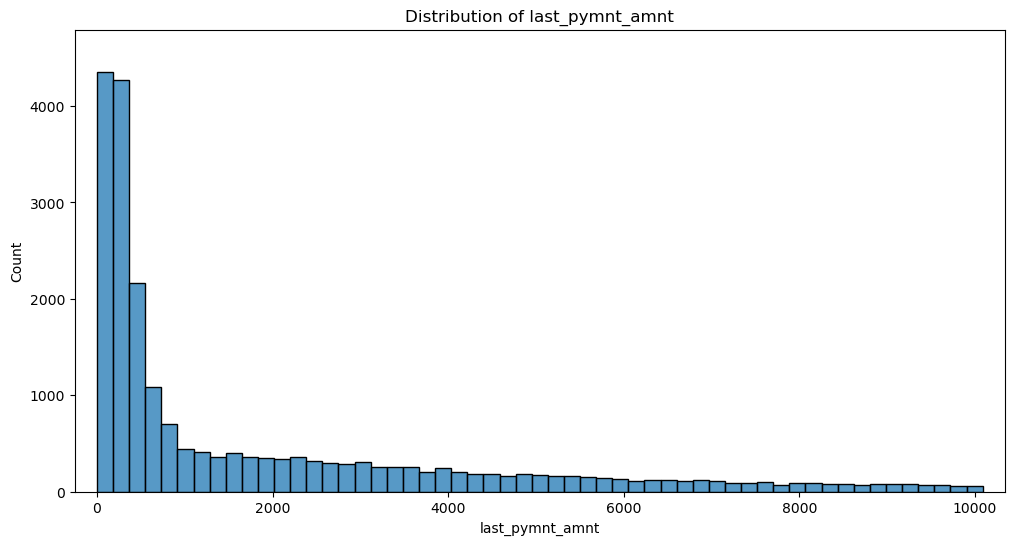

In [16]:
#get all numeric data values and plot chart
numeric_cols_df = loan_data_cleaned_copy.select_dtypes(include=['number'])
#finding unique values in column
unique_counts = numeric_cols_df.nunique()
numeric_cols = unique_counts[unique_counts > 1].index
for col_name in numeric_cols:
    
    # Create the count plot
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(x=col_name, data = loan_data_cleaned_copy)

    # Calculate the percentages
#     show_percentage(ax)

    #add margin
    plt.margins(x=0.025, y=0.1)

    plt.title(f'Distribution of {col_name}')
    plt.xlabel(col_name)
    plt.show()

### Observations of Univariate analysis of numeric data values
    1. Most of the people took loan amount range from  3000-15000, very small percentage of loan is more than 25000
    
    2. funded_amnt, funded_amnt_inv also same pattern as loan_amnt
    
    3. Most of the loan interest rate falls into the category of 5-16 and there are also loans with very high interest rate as well
    
    4. Annual income of borrowers mostly fall in the range of 20K-100K
    
    5. dti( Dept to Income ratio) is a major credit worthiness measurement, most of the borrowers have dti in the range .5-25
    
    


### Analyse categorical data values 

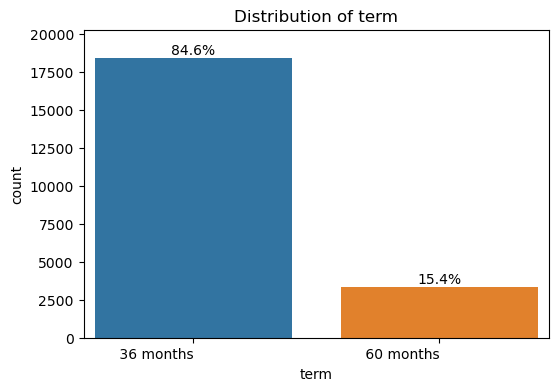

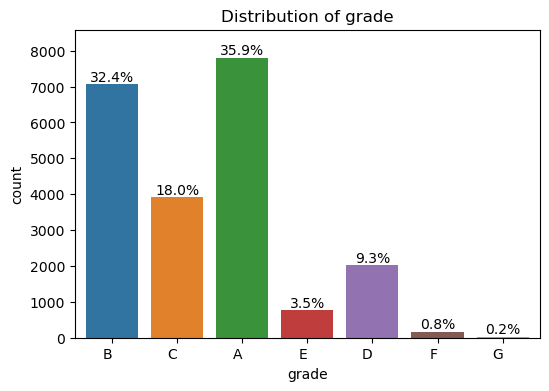

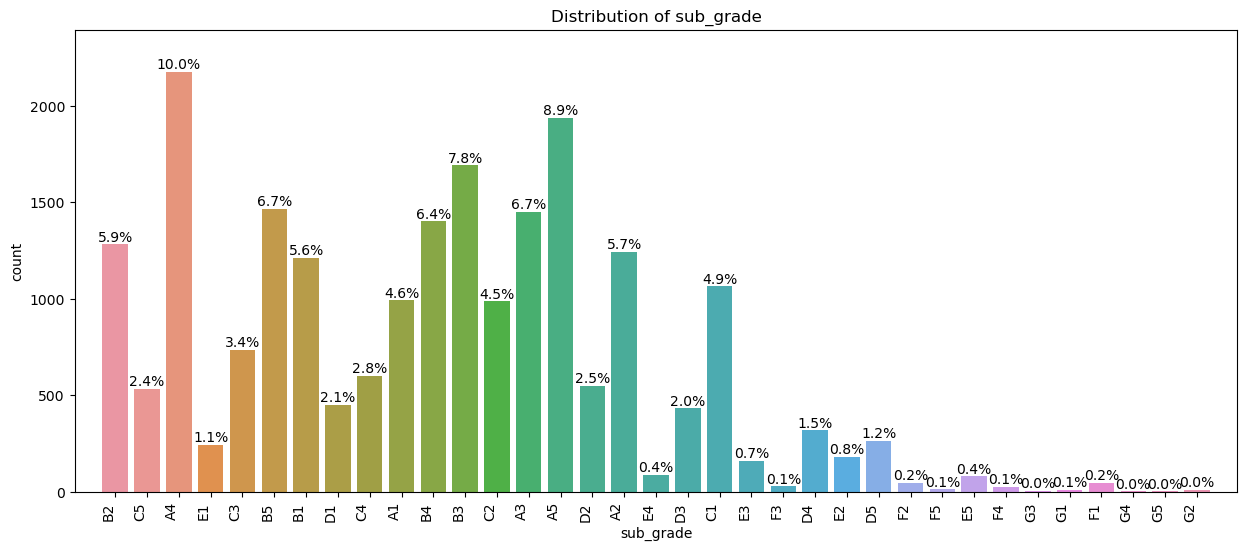

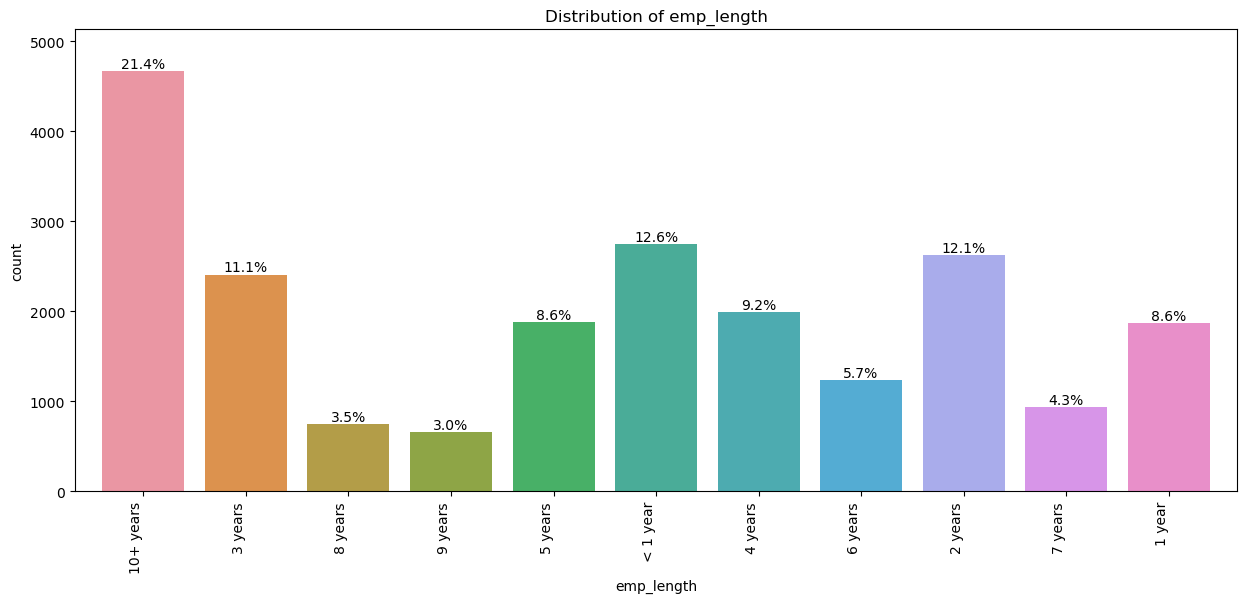

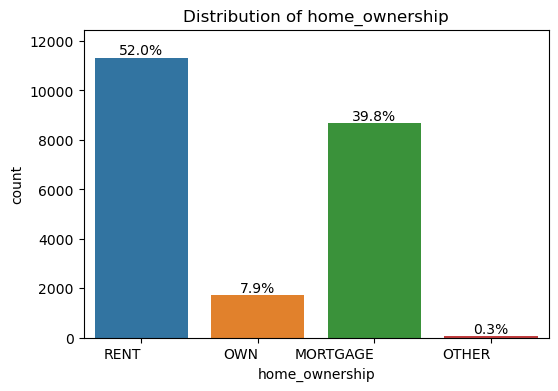

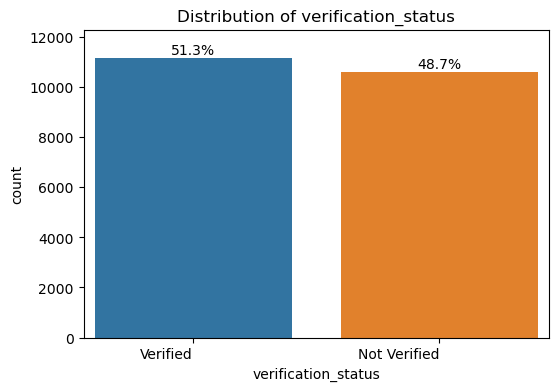

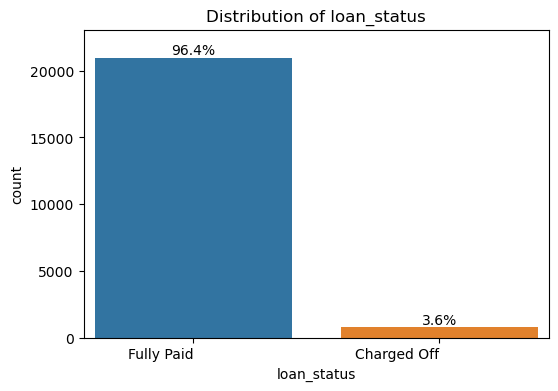

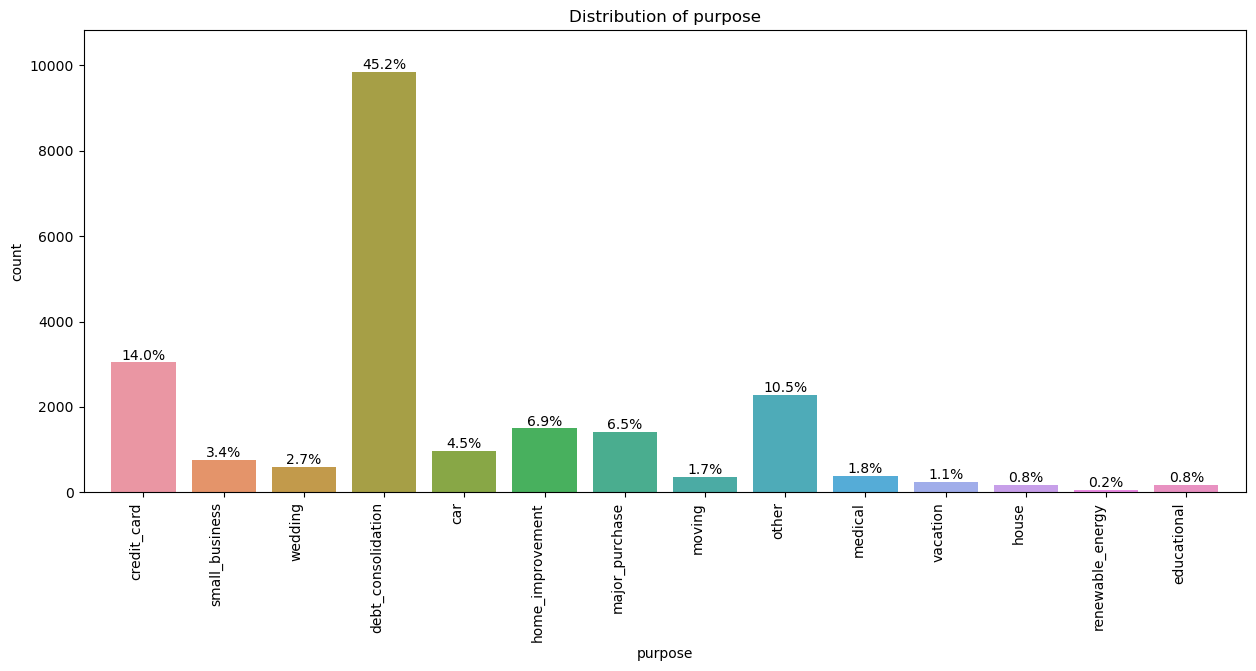

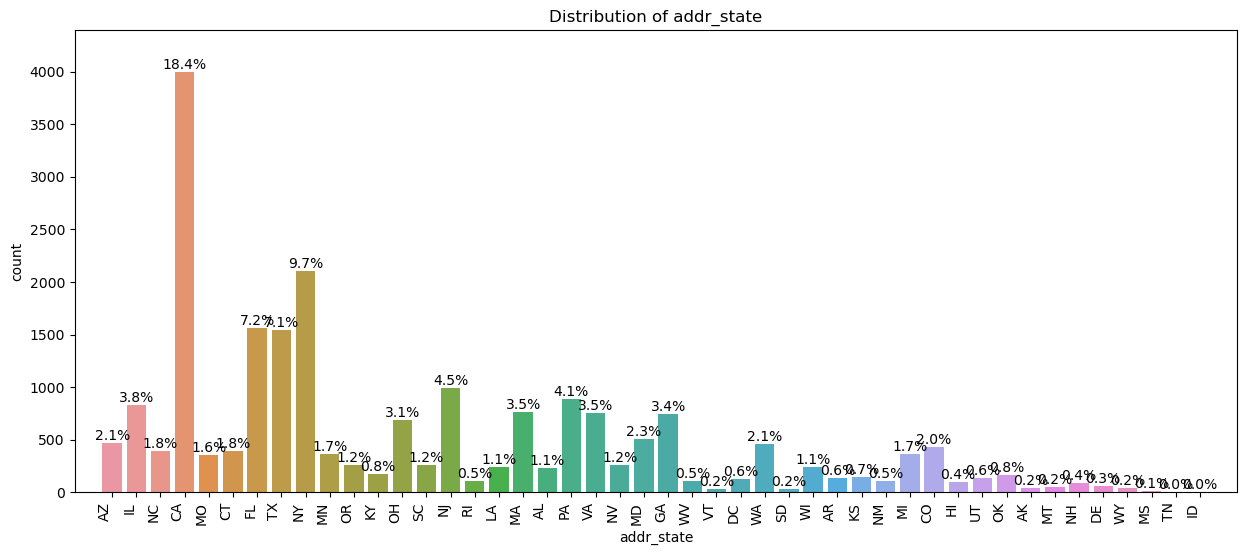

In [17]:
#get all numeric data values and plot chart
cat_cols_df = loan_data_cleaned_copy.select_dtypes(include=['object', 'category'])
#finding unique values in column
unique_counts = cat_cols_df.nunique()
cat_cols = unique_counts[unique_counts > 1].index

for col_name in cat_cols:
    
    show_count_percentage = True
    x_tick_rotation = 0
    
    # Create the count plot
    #Not plotting chart of more than 100 categorical variable
    if unique_counts[col_name] > 100:
        continue
        
    elif unique_counts[col_name] > 50:
        plt.figure(figsize=(25, 6))
        x_tick_rotation = 90
        show_count_percentage = False
        
    elif unique_counts[col_name] > 10:
        plt.figure(figsize=(15, 6))
        x_tick_rotation = 90
        
    else:
        plt.figure(figsize=(6, 4))
        x_tick_rotation = 0
    
    ax = sns.countplot(x=col_name, data = loan_data_cleaned_copy)
    
    if show_count_percentage:
        # Calculate the percentages
        show_percentage(ax)
    
    #add margin
    plt.margins(x=0.025, y=0.1)

    plt.title(f'Distribution of {col_name}')
    plt.xlabel(col_name)
    # Get the current labels and trim them
    trimmed_labels = trim_labels([label.get_text() for label in ax.get_xticklabels()], 20)

    # Set the new trimmed labels
    ax.set_xticklabels(trimmed_labels, rotation=x_tick_rotation, ha='right')
    plt.show()

### Observations of Univariate analysis of categorical data values
    1. 88% of borrowers availed 36 months term for the loan
    
    2. 70% of the loans borrowers fall in either A or B grade and  less than 1% is fall in lowest grade of F and G
    
    3. More than 75% the loans borrowers subgrage is in the range A1-D2
    
    4. Most of the borrowers do have employment length more than 10+ or less than 1 year 
    
    5. 96% of the individuals availed loan paid it fully only 3.5% is defaulted
    
    6. 45% of the loan availed is for debt consolidation
    
    7. Most of the people who took loan belongs to CA state 

## Segmented Univariate Analysis

### Analys numerical data variables w.r.t loan status 

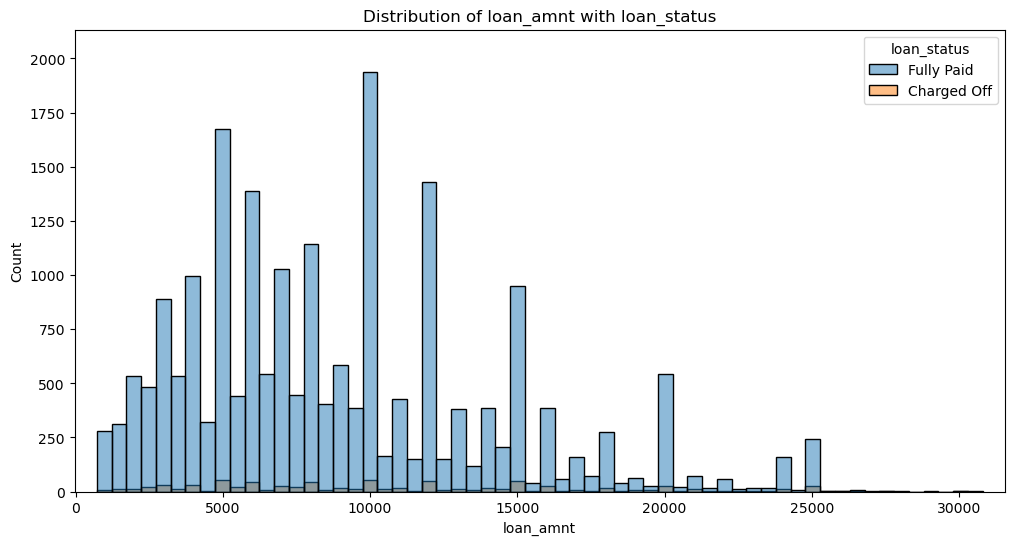

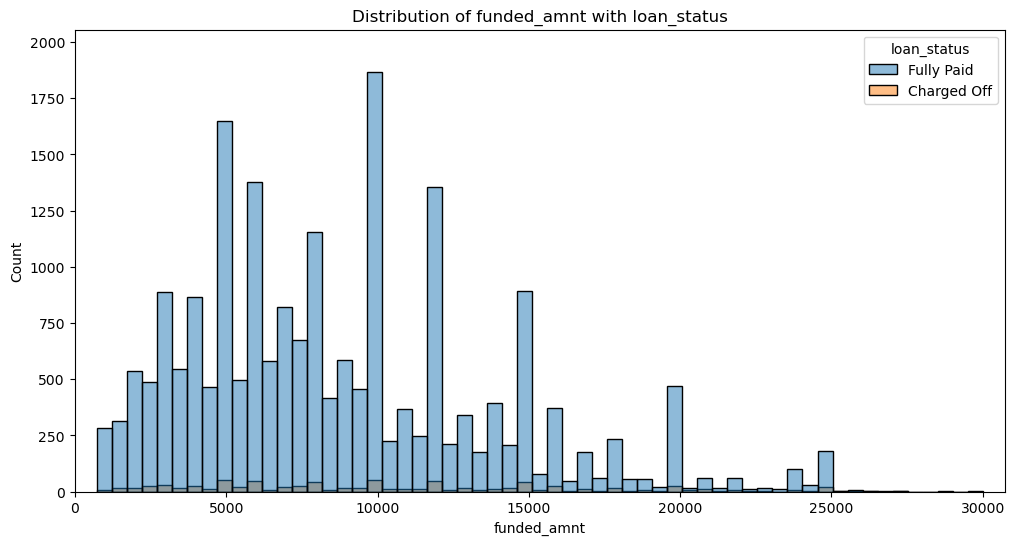

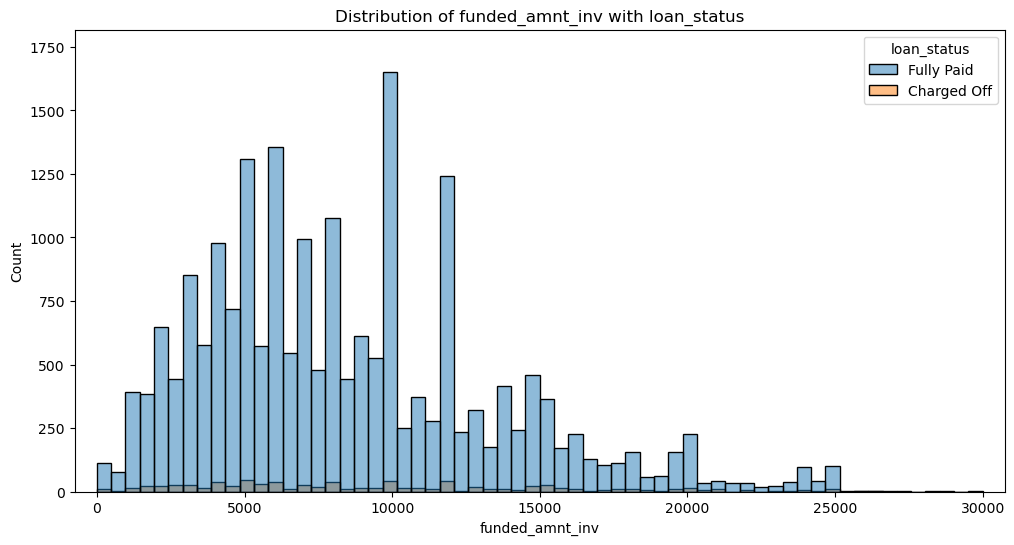

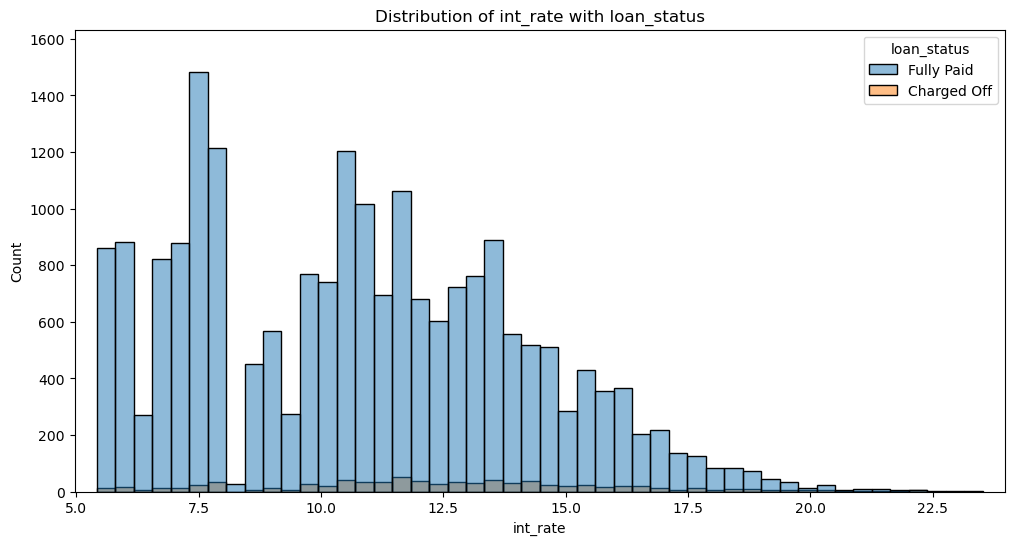

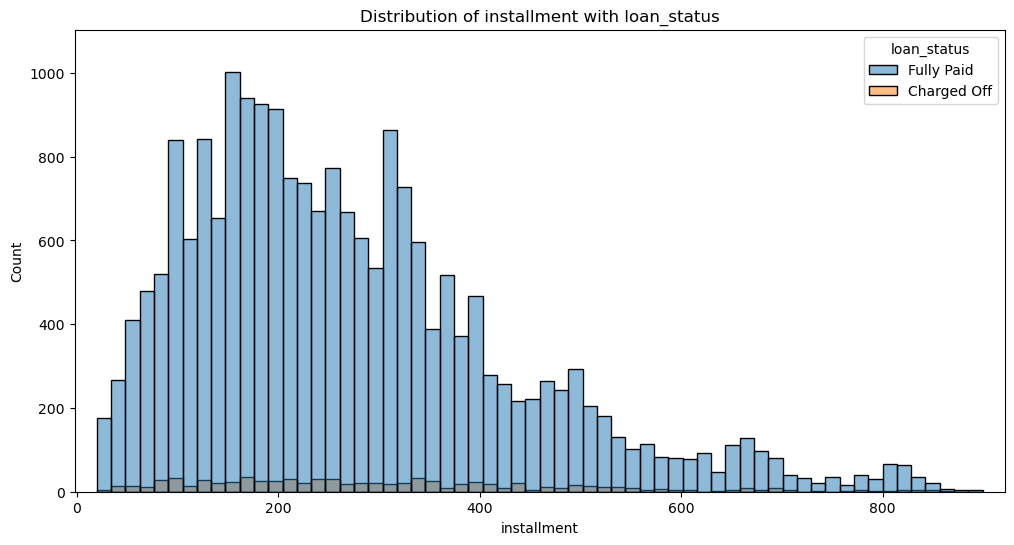

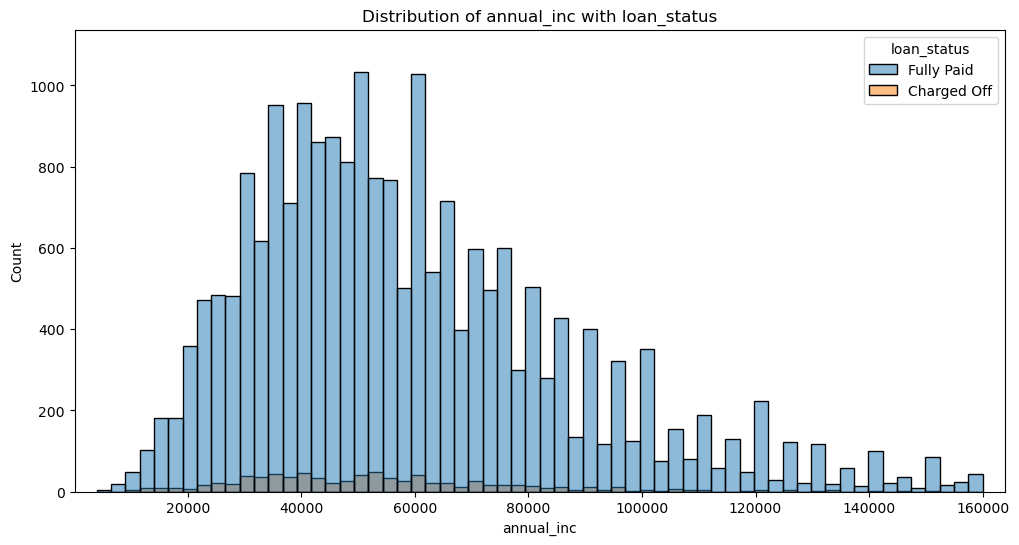

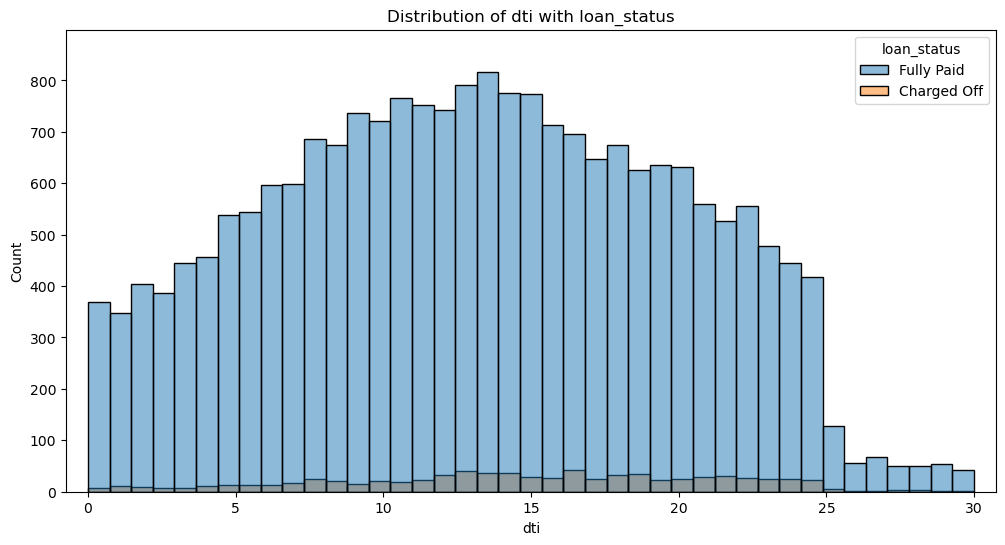

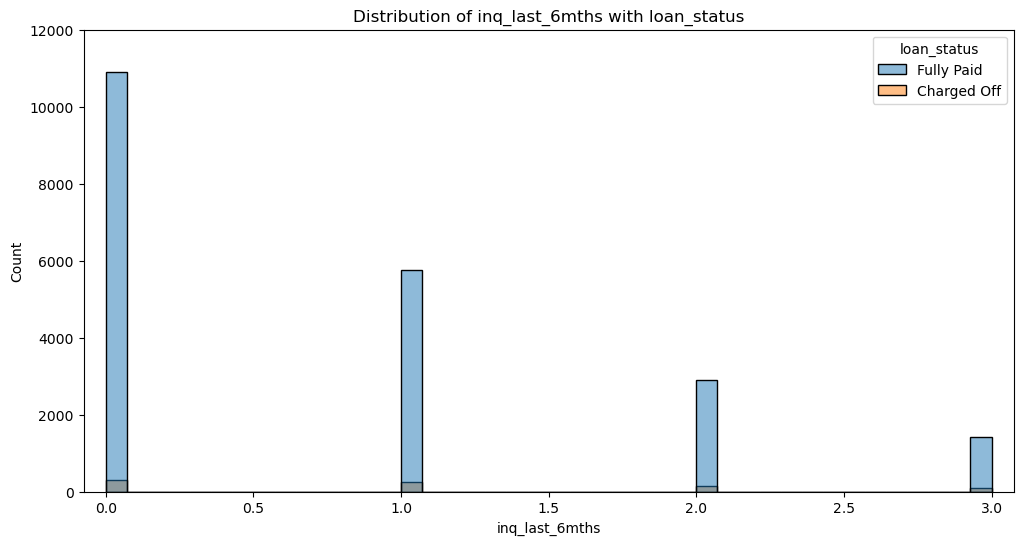

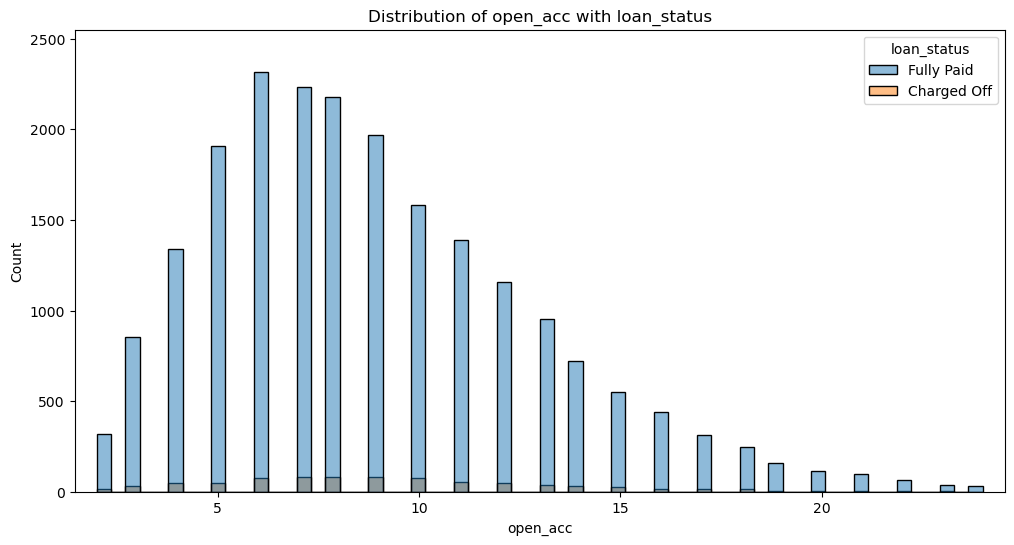

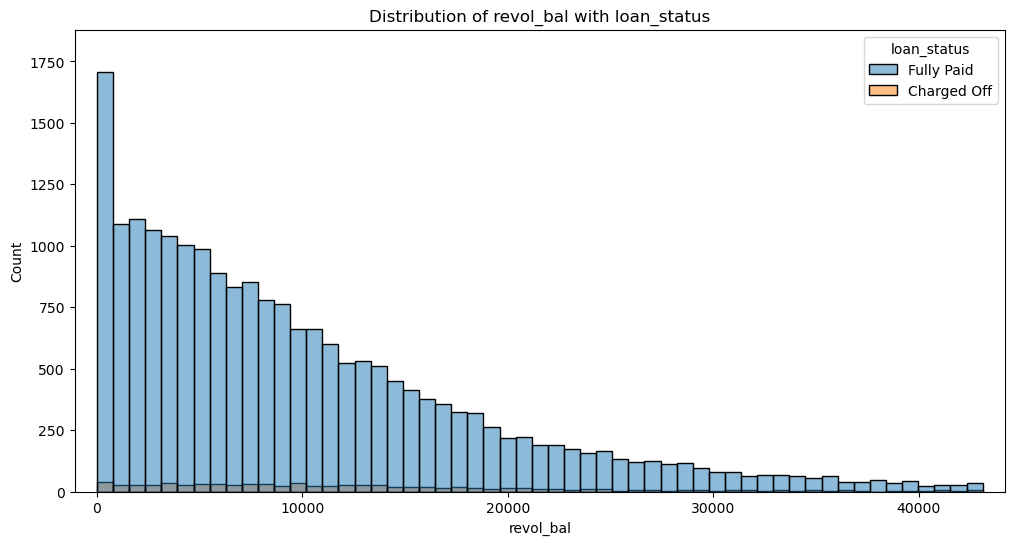

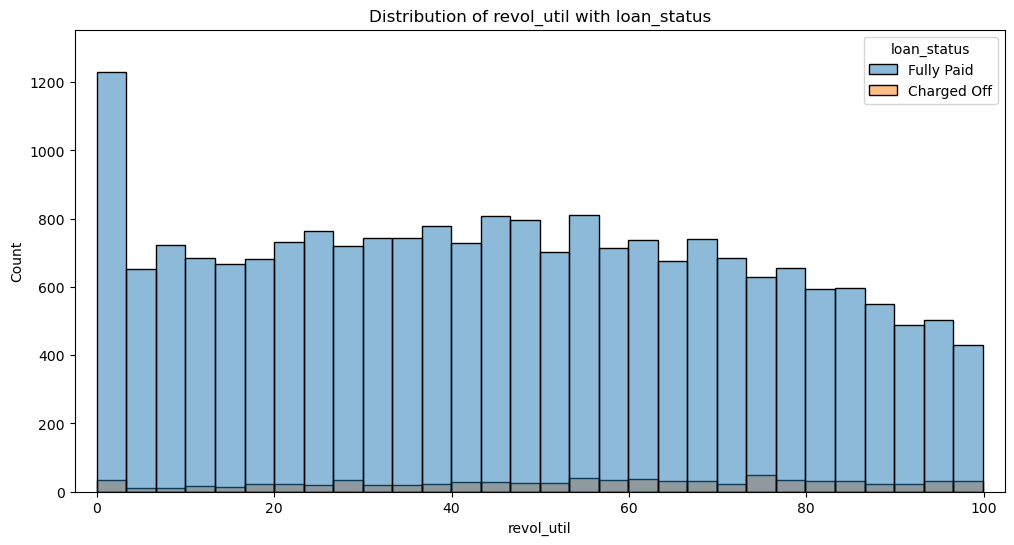

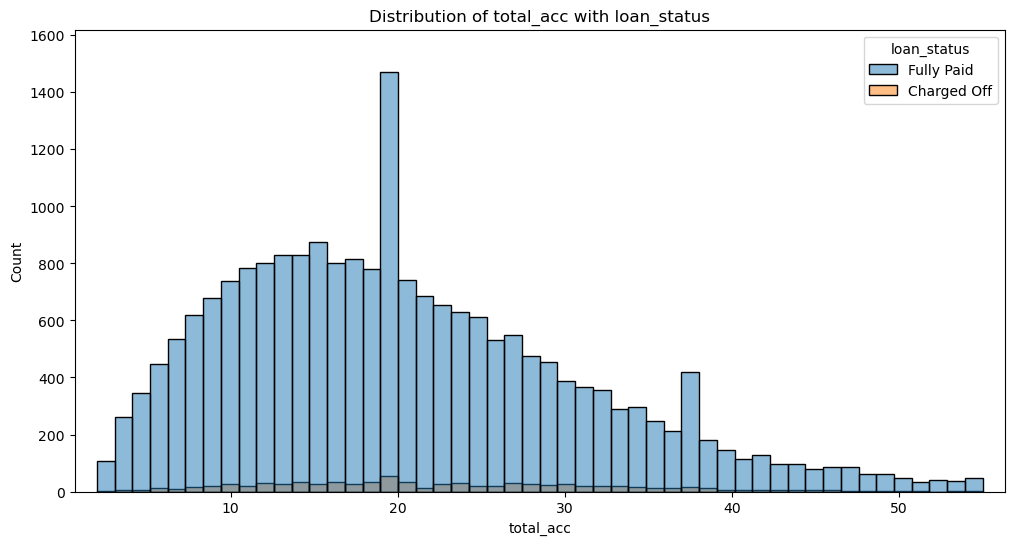

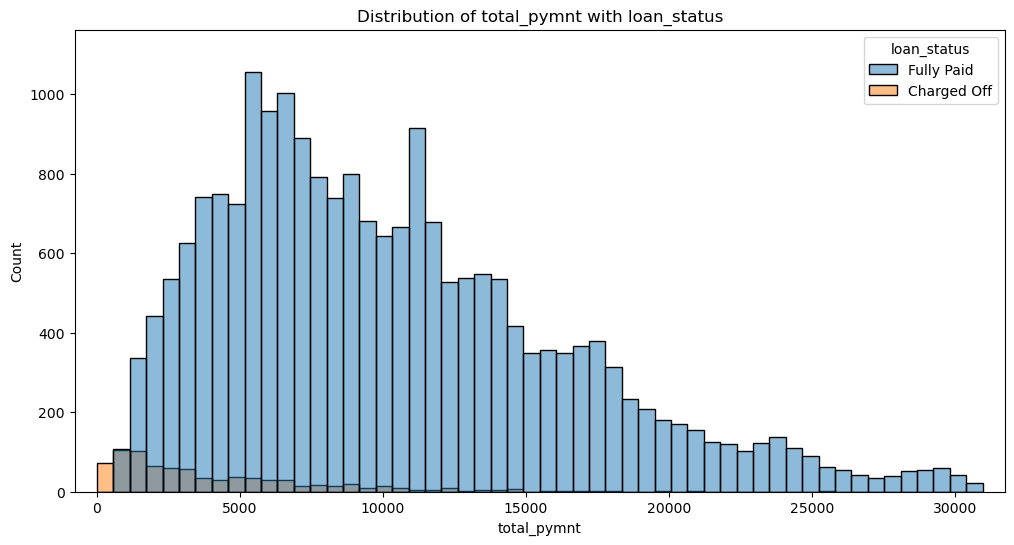

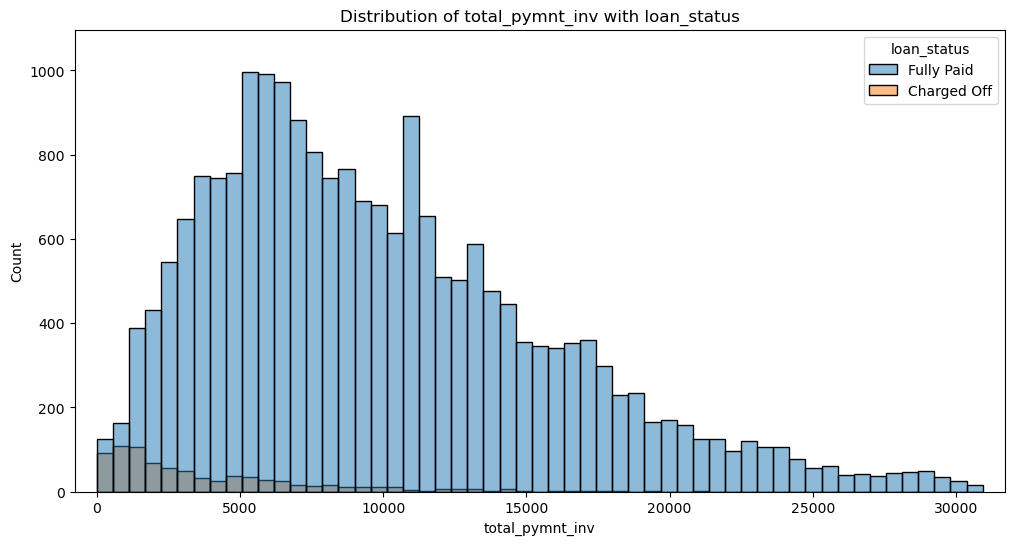

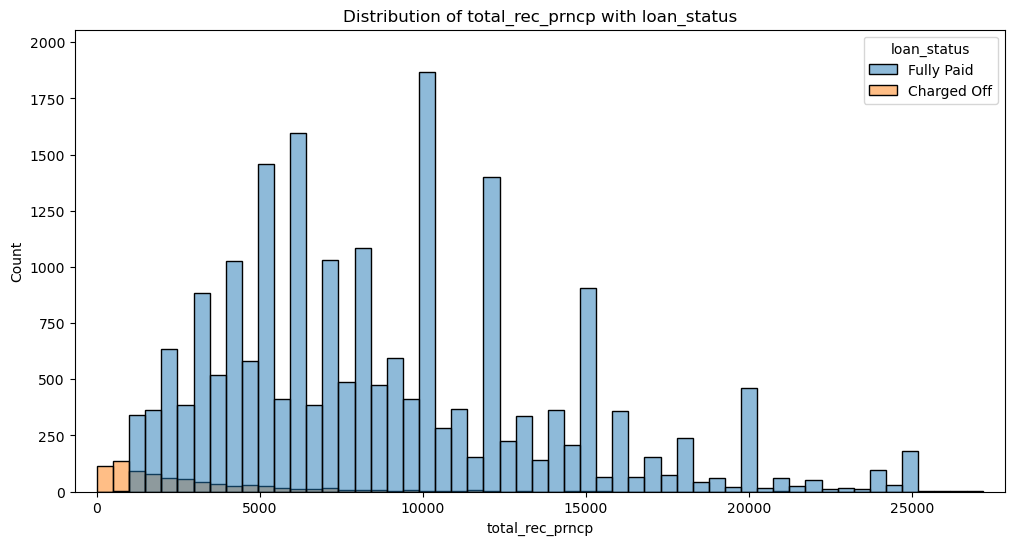

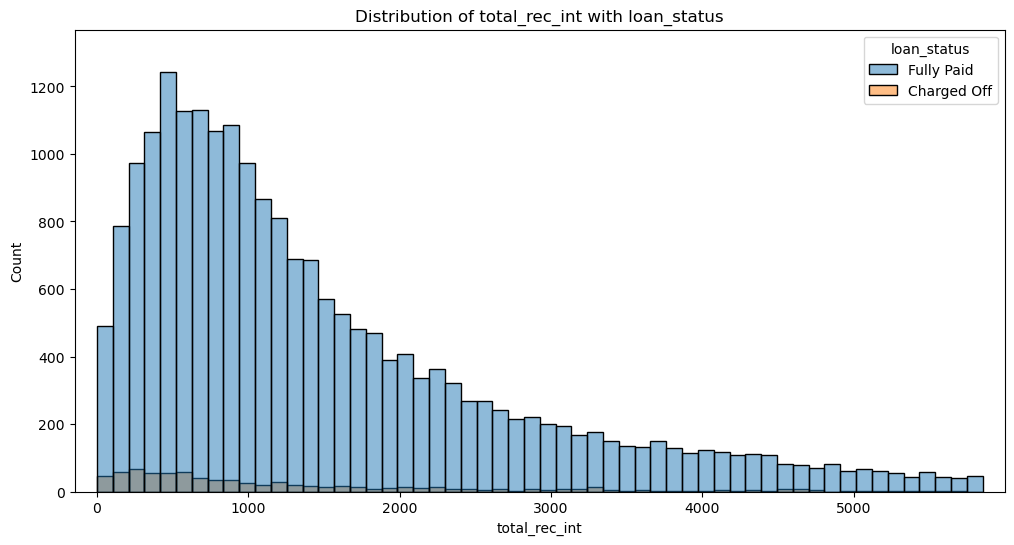

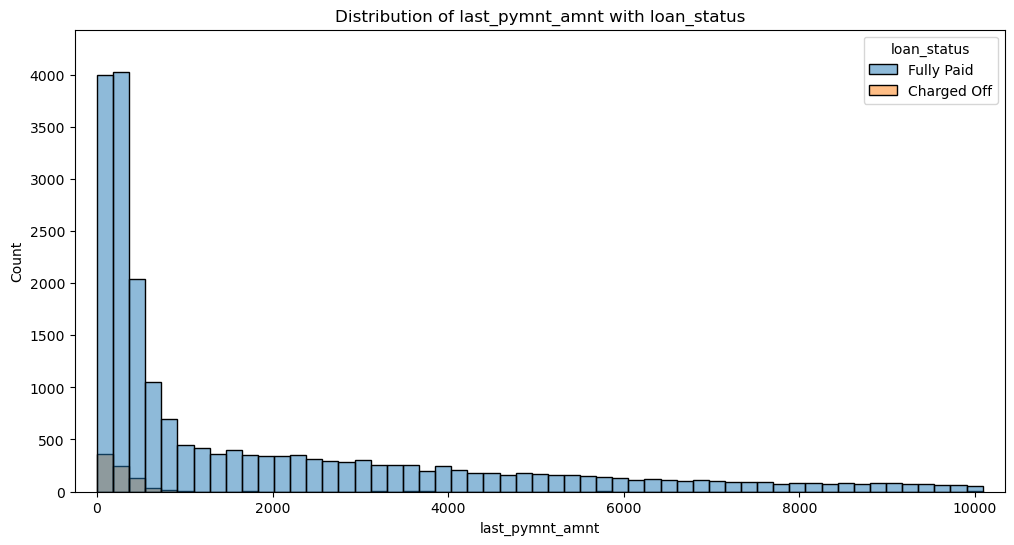

In [18]:
#get all numeric data values and plot chart
numeric_cols_df = loan_data_cleaned_copy.select_dtypes(include=['number'])
#finding unique values in column
unique_counts = numeric_cols_df.nunique()
numeric_cols = unique_counts[unique_counts > 1].index
for col_name in numeric_cols:
    
    # Create the count plot
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(x=col_name, data = loan_data_cleaned_copy, hue='loan_status')


    #add margin
    plt.margins(x=0.025, y=0.1)

    plt.title(f'Distribution of {col_name} with loan_status')
    plt.xlabel(col_name)
    plt.show()

### Observations of Univariate analysis of numeric data values
    1. Most of the loans are fully paid when the loan amount is in the range 1000 - 15000, when the loan amount is increasing the ratio of changed off to fully paid loan is higher, sam applicable to funded_amnt also
    
    2. Most of the loans are fully paid when the interest rate is in the range 4-16 and beyond 16 there are very less loans disbursed and chance of it is getting Charged off is higher
    
    3. Annal income of most of the borrowers fully paid the loan fall in the range 30000 - 80000 , and there are more number of defaulted loans when the annual income is less than 40000
    
    4. dept to income ratio is another factor determining the creditworthiness of the borrower, in the plot if the dti is more than 25, there are more chance of the loan is getting defaulted, count of fully paid loans are more for dti range 5-15

### Analys categorical data variables w.r.t loan status 

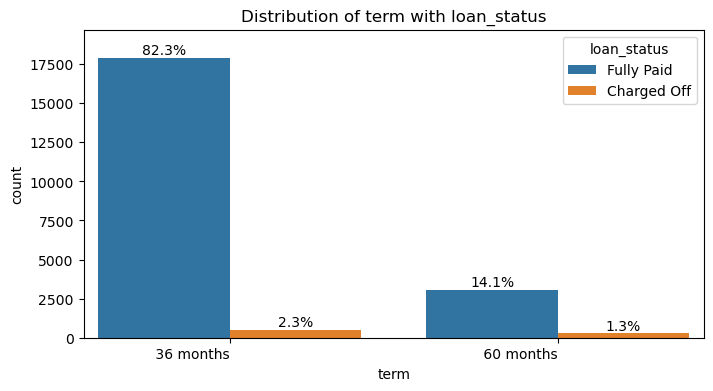

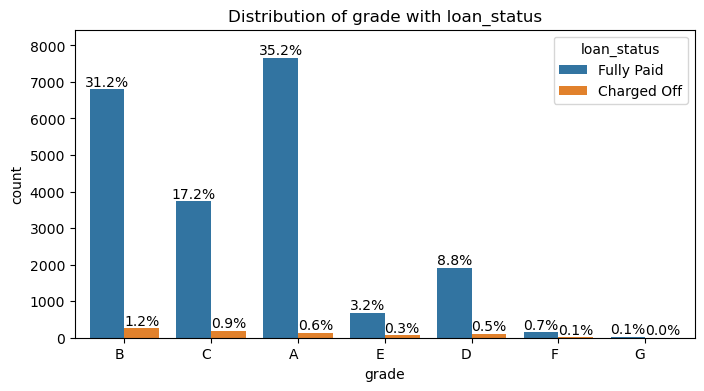

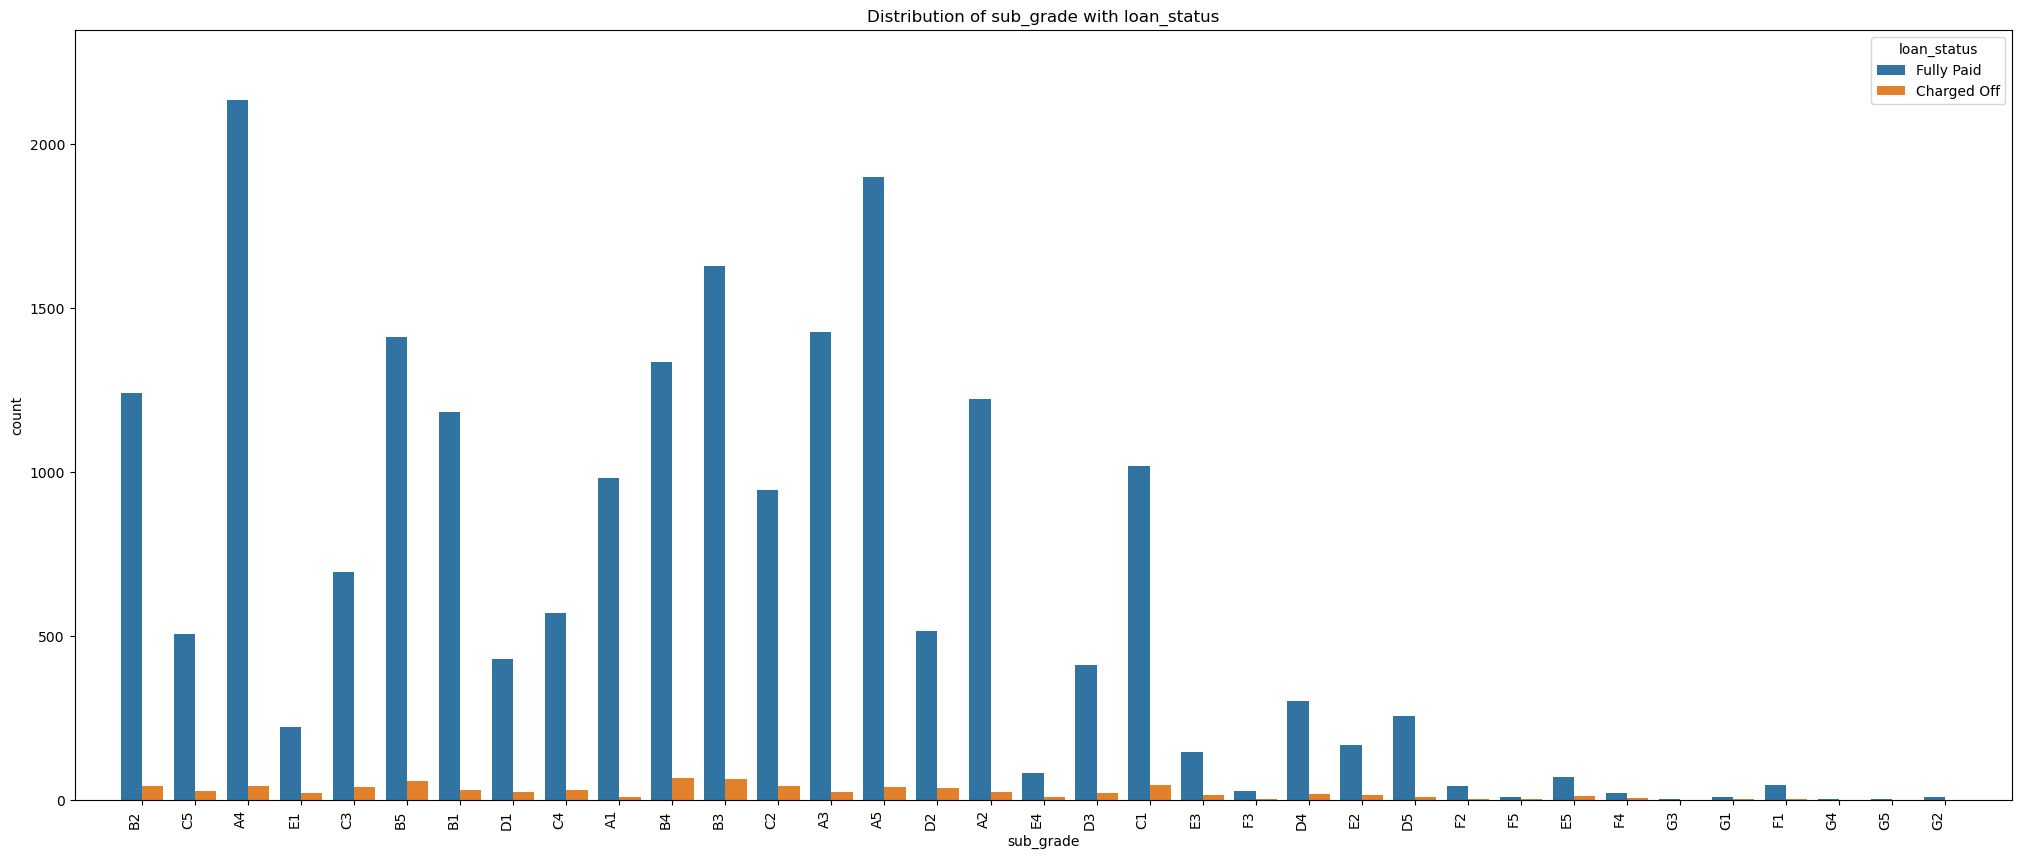

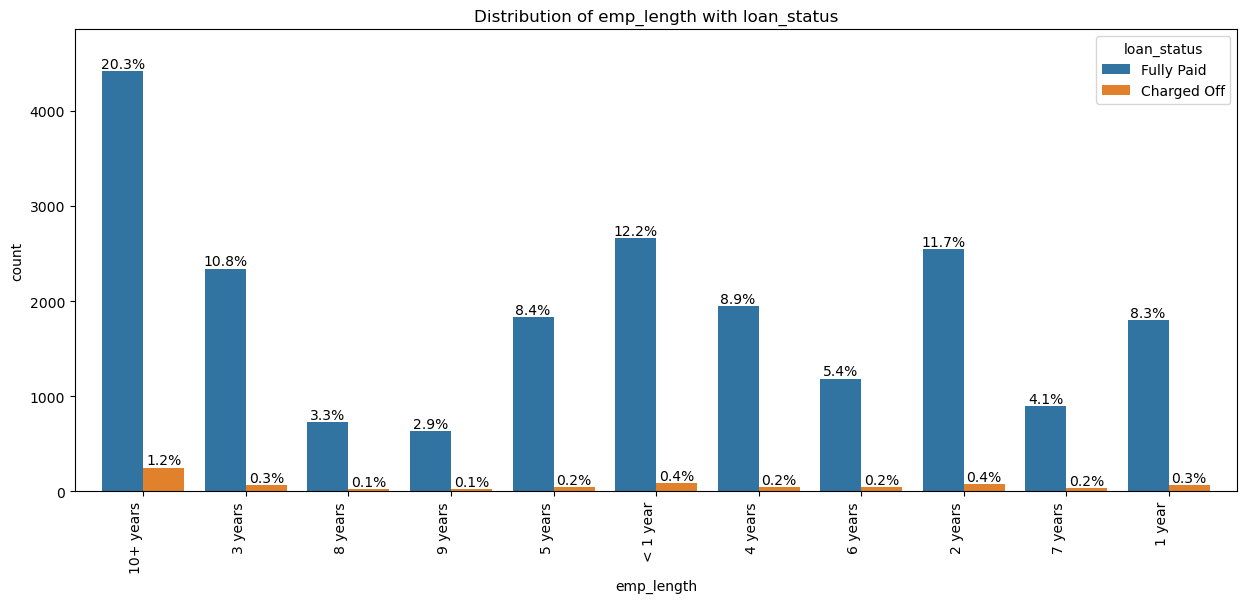

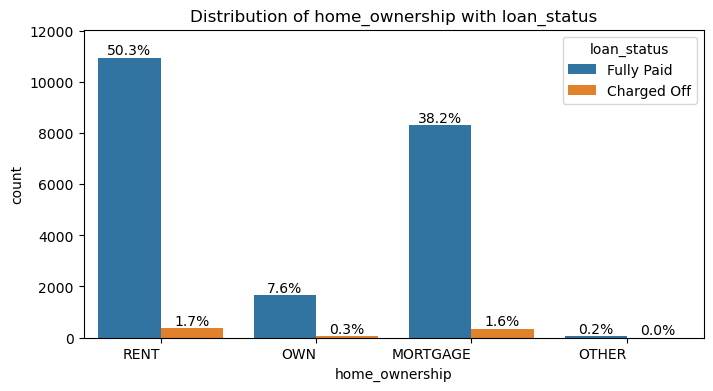

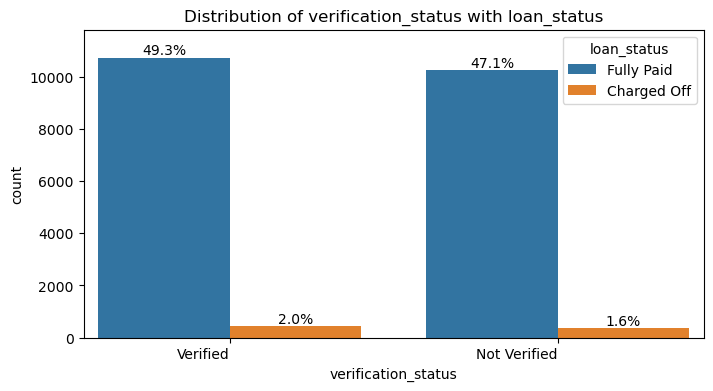

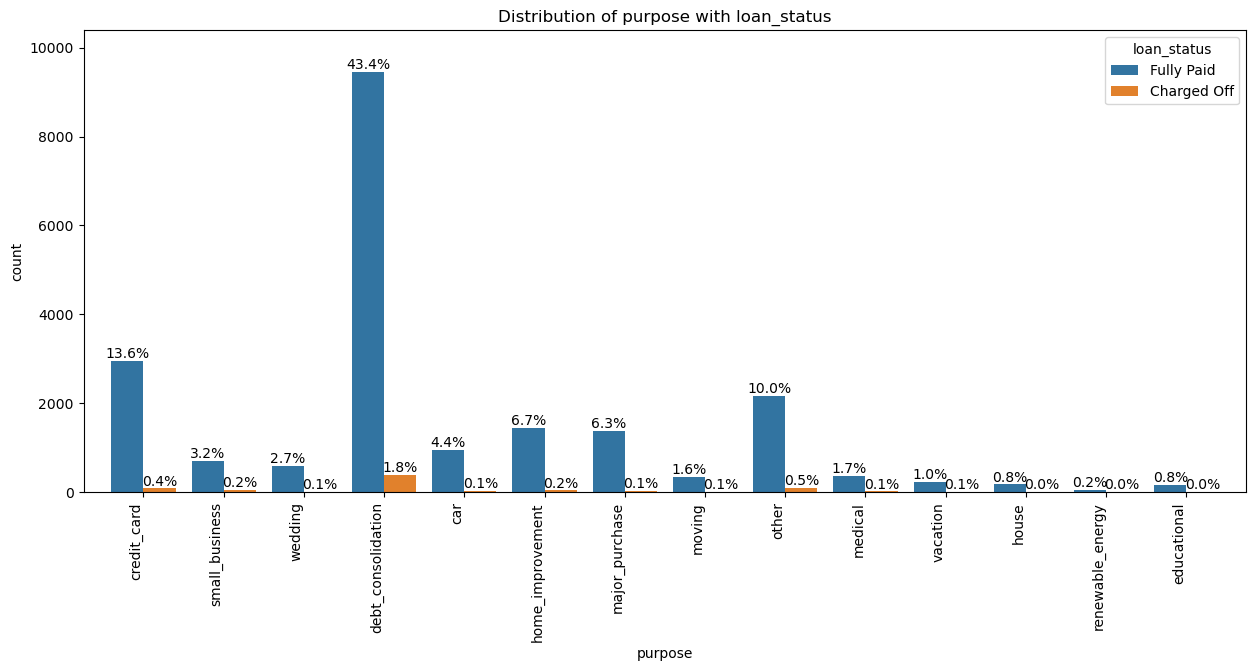

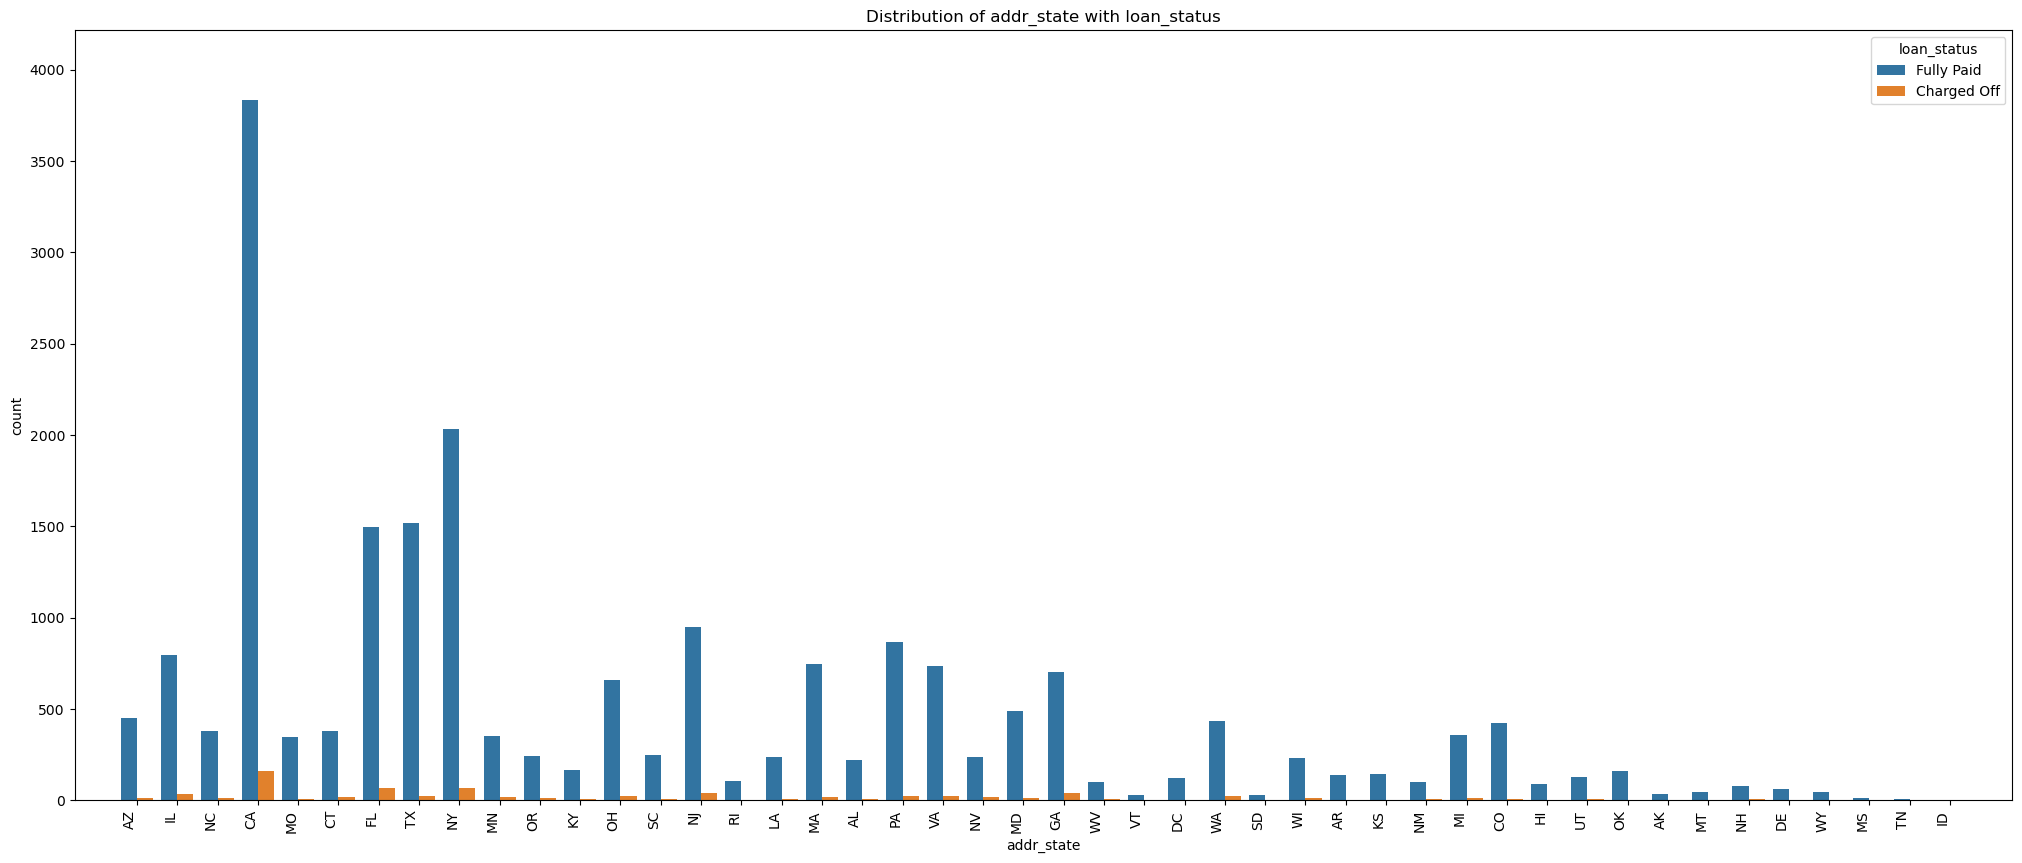

In [19]:
#get all numeric data values and plot chart
cat_cols_df = loan_data_cleaned_copy.select_dtypes(include=['object', 'category'])
#finding unique values in column
unique_counts = cat_cols_df.nunique()
cat_cols = unique_counts[unique_counts > 1].index

for col_name in cat_cols:
    
    #skiping loan status  plot as it is considered as segmentation parameter
    if col_name == 'loan_status':
        continue
    
    show_count_percentage = True
    x_tick_rotation = 0
    
    # Create the count plot
    #Not plotting chart of more than 100 categorical variable
    if unique_counts[col_name] > 100:
        continue
        
    elif unique_counts[col_name] > 25:
        plt.figure(figsize=(25, 10))
        x_tick_rotation = 90
        show_count_percentage = False
        
    elif unique_counts[col_name] > 10:
        plt.figure(figsize=(15, 6))
        x_tick_rotation = 90
        
    else:
        plt.figure(figsize=(8, 4))
        x_tick_rotation = 0
    
    ax = sns.countplot(x=col_name, data = loan_data_cleaned_copy, hue='loan_status')
    
    if show_count_percentage:
        # Calculate the percentages
        show_percentage(ax)
    
    #add margin
    plt.margins(x=0.025, y=0.1)

    plt.title(f'Distribution of {col_name} with loan_status')
    plt.xlabel(col_name)
    # Get the current labels and trim them
    trimmed_labels = trim_labels([label.get_text() for label in ax.get_xticklabels()], 20)

    # Set the new trimmed labels
    ax.set_xticklabels(trimmed_labels, rotation=x_tick_rotation, ha='right')
    plt.show()

### Observations of Univariate analysis of categorical data values
    1. Most of the people took loan for 36 month term and for 60 month term the percentage rate of charged off loans are higher compared to 36 months
    
    2. More than half of the defaulted loans falls in to B and C grade and ratio of full paid to defaulted loans is higher in lower grade loans
    
    3. More charged off loans are taken by individuals with more than 10+ employment length and less than 1 year 
    
    4. People who have own home defauled loan very less, and rented or mortgage category defaulted the loan more
    
    5. More loans are disbursed in CA state and more changed off loans are also from same state.

## Bivariate Analysis

#### Bivariate analysis is done with combination of customer information data and loan characteristics data values

### Analysis Loan Amount vs Interest Rate

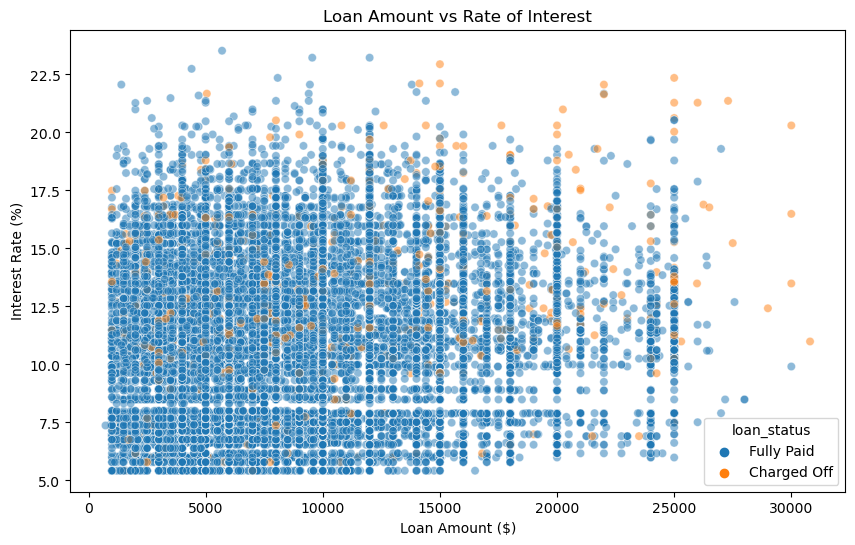

In [22]:
# Bivariate analysis Loan Amount vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned_copy, x='loan_amnt', y='int_rate', alpha=0.5, hue='loan_status')
plt.title('Loan Amount vs Rate of Interest')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.show()

#### Observation  :  When loan amount and interest rates are higher the chance of loan getting charged-off is also higher , in the above figure more loans are in charged-off state when interest rate is more than 17.5 %

### Analysis on Loan Amount vs Annual Income

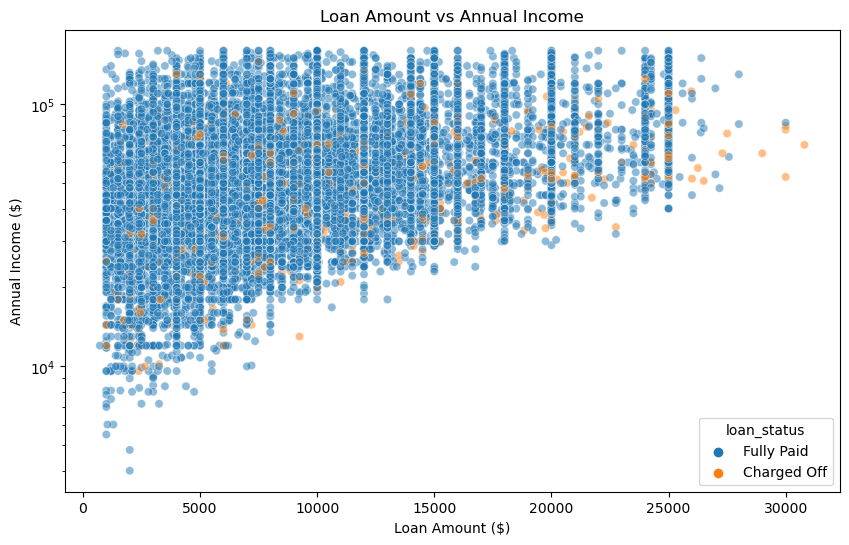

In [26]:
# Bivariate analysis on Loan Amount vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned_copy, x='loan_amnt', y='annual_inc', alpha=0.5, hue='loan_status')
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.show()

#### Observation : Loan Amount vs Annual Income showing inclination trend , such that when annual income increases(not all cases) the loan amount is also showing upward trend

### Analysis on Interest Rate vs Loan Term

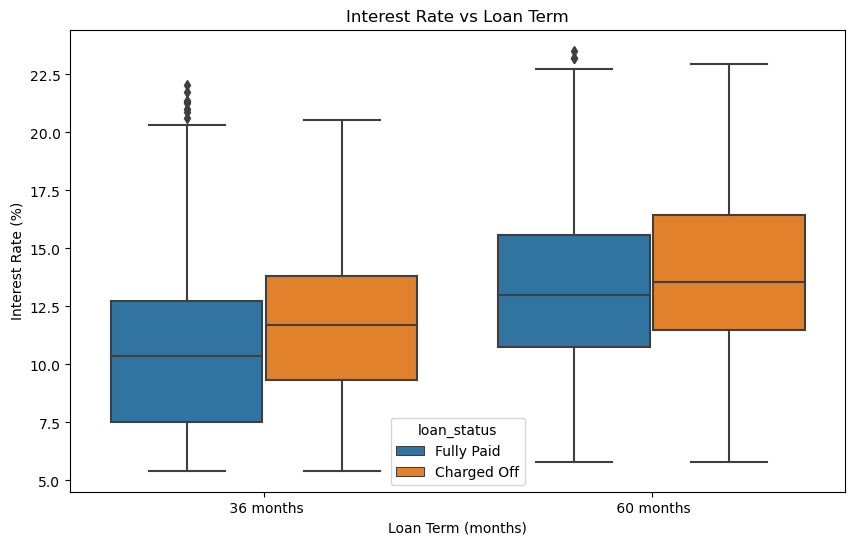

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned_copy, x='term', y='int_rate', hue='loan_status')
plt.title('Interest Rate vs Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Interest Rate (%)')
plt.show()

#### Observation : Its is clean from the above figure that individuals took loan with higher interest rate and 60Month term tend to default it.

### Analysis on Loan Grade vs Interest Rate

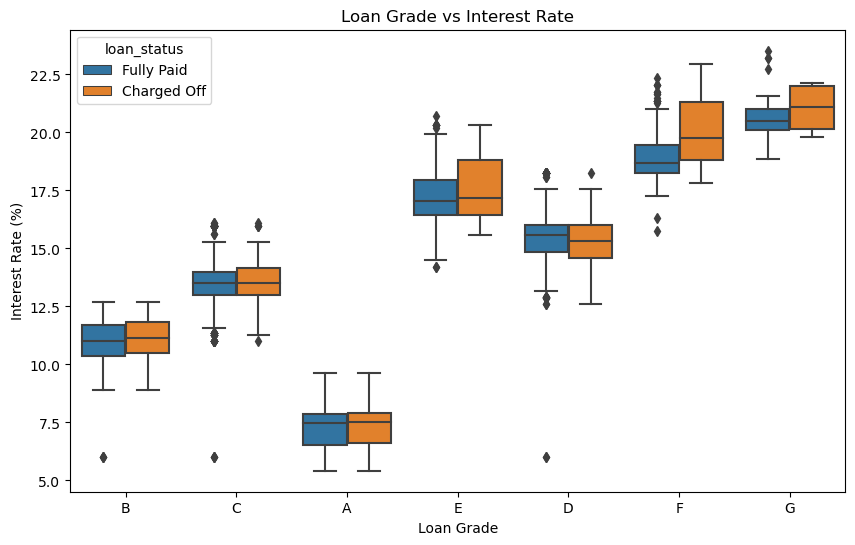

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned_copy, x='grade', y='int_rate', hue='loan_status')
plt.title('Loan Grade vs Interest Rate')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

#### Observation :Fig above shows loans with grade (A,B,C) comes under interest rate below 17.5 most of the cases and lower grade loans do have high interest rate and more changce of default

### Analysis on dti vs Interest rate

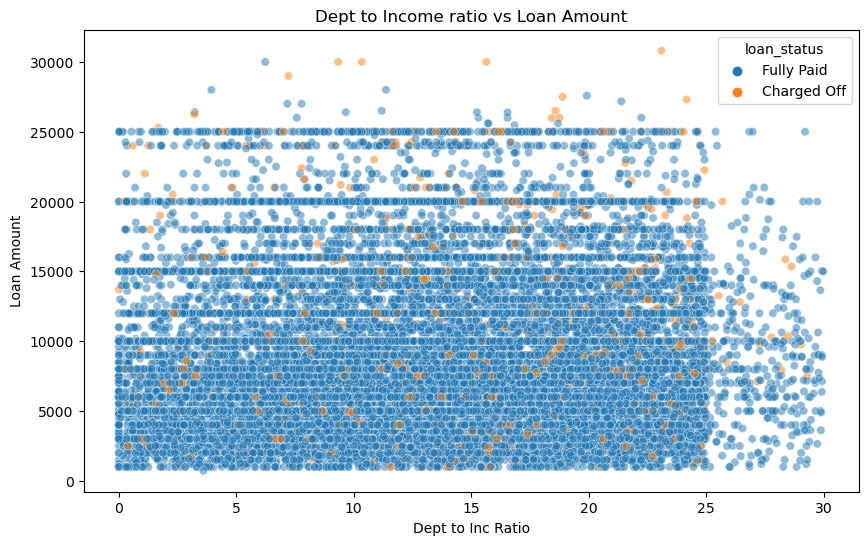

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned_copy, x='dti', y='loan_amnt', alpha=0.5, hue='loan_status')
plt.title('Dept to Income ratio vs Loan Amount')
plt.xlabel('Dept to Inc Ratio')
plt.ylabel('Loan Amount')
plt.show()

#### Observation  : Fig above shows more fully paid loans comes under dti below 25 and most of the individuals with more dti have taken loan amount less than 20000

### Analysis on Emp length vs Interest rate

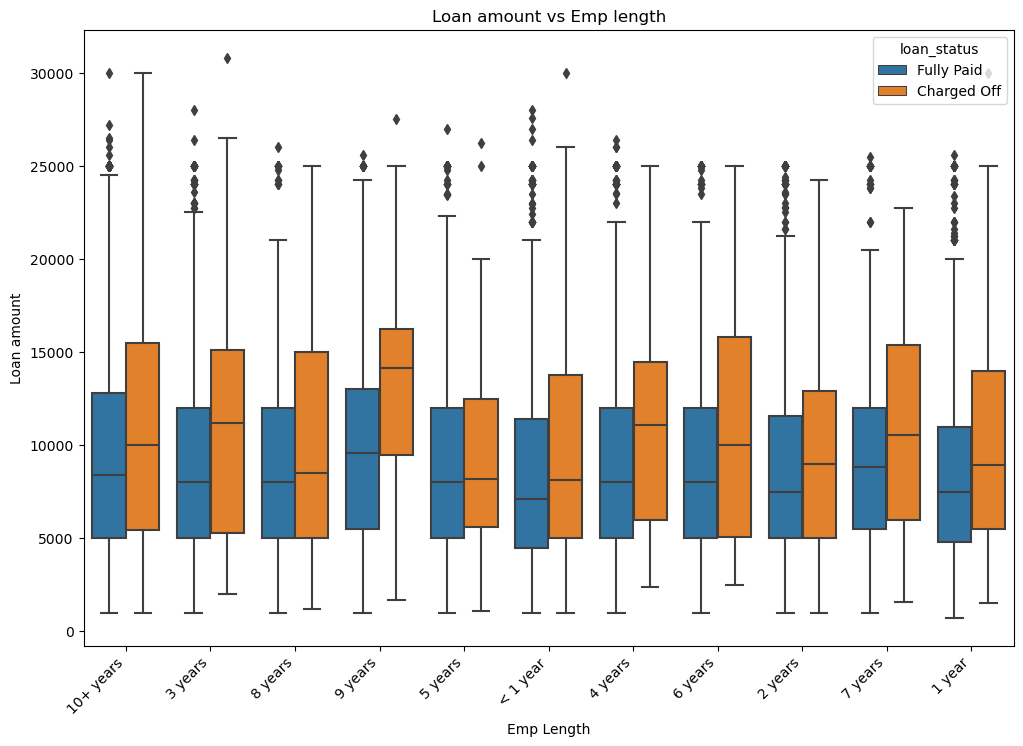

In [57]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=loan_data_cleaned_copy, x='emp_length', y='loan_amnt', hue='loan_status')
plt.title('Loan amount vs Emp length')
plt.xlabel('Emp Length')
plt.ylabel('Loan amount')
# Get the current labels and trim them
trimmed_labels = trim_labels([label.get_text() for label in ax.get_xticklabels()], 20)

# Set the new trimmed labels
ax.set_xticklabels(trimmed_labels, rotation=45, ha='right')
plt.show()

## Multivariate Analysis

### multivariate analysis show the correlation between different customer attributes and loan characteristics fields

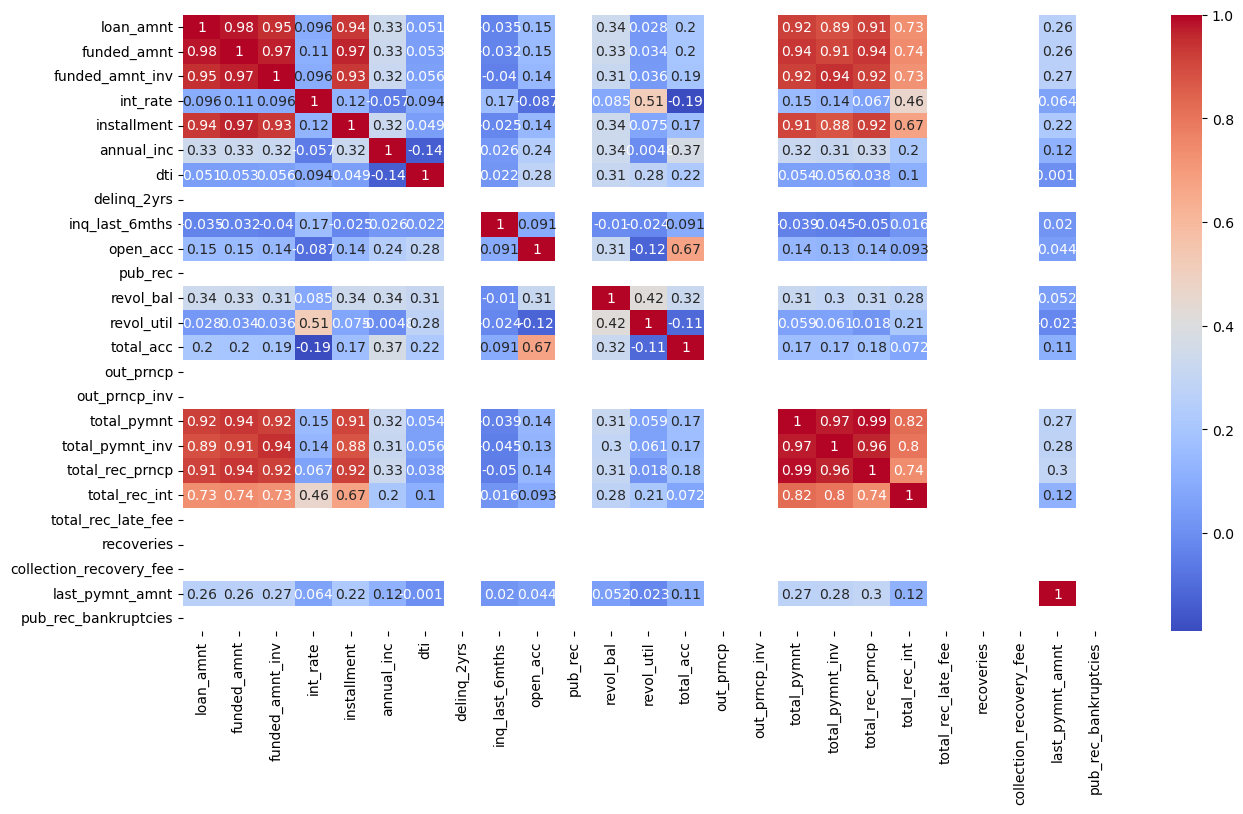

In [42]:
#Heat map of correlation matrix of numeric data values
plt.figure(figsize=(15, 8))
numeric_type_df = loan_data_cleaned_copy.select_dtypes(include=['number'])
corr_matrix = numeric_type_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### observations : The above plot shows annual_inc and dti is negatively correlated, there is strong correlation betwen loan_amnt, funded_amnt, and installment